<< Thu Big Data Challenge 2019 >>

Author : Andy RK Chang & 陳宇修

Date : Jul 20, 2019

Version : 1.01


G11-1-AC(7X15)20160126-002_Export.txt  ===> G11-1-AC(7X15)20160126-002Export.txt



## (*****) Setup Python Training Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plts
import math
import glob
import os.path
from operator import mod

from scipy import stats

%matplotlib inline

## (*****) Read file from Google Drive

In [2]:
# Read file from Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

##  (*****) Function Definition

In [9]:
# global variable definition and initial

myDriveFilePath = './raw_data/'
recipeGroup = ['G11','G15', 'G17', 'G19', 'G32', 'G34', 'G48', 'G49']

# color definition refer to https://www.cnblogs.com/darkknightzh/p/6117528.html
PTCcolor = ['purple','red','coral','saddlebrown','orange','olive','limegreen','blue','cyan','yellow'] 

rgColumns = ['filename','groupid','eqpid','date','sno','PTCno','count','mean','std','min','Q1','Q2','Q3','max','median']

## ,'start2max_time','stable_time','max2end_time','totaltime' ]


In [10]:
## Function Module

#
# get RecipeGroup File List function 
#
def getRecipeGroupFileList(aRecipeGroup):

  aFileList = glob.glob( myDriveFilePath + aRecipeGroup +  "/*.txt")
    
  return aFileList

#
# get file attribute function
#
def getFileAttributeList(aFile):

  #filename : G11-1-AC(7X15)20160126-002_Export
  #groupid : G11
  #eqpid : AC(7X15)
  #date : 20160126
  #sno : 002
  
  aFileAttributeList=[]
  
  aFileAttributeList.append(aFile)                                                #filename 0
  aFileAttributeList.append(aFile[aFile.find('G')+1:aFile.find('G')+3])           #groupid 1
  aFileAttributeList.append(aFile[aFile.find('AC'):aFile.find(')')+1])            #eqpid 2
  aFileAttributeList.append(aFile[aFile.find(')')+1 : aFile.find(')')+9 ])        #date 3
  aFileAttributeList.append(aFile[aFile.find('_')-3 : aFile.find('_') ])          #sno 4

  return aFileAttributeList

#
# read recipe Group file data function
#
def readRecipeGroupFile(aFileName):
  
  fp = pd.read_csv(aFileName,sep="\t")                                # read file 分隔符號為 tab /t'
  fp = fp.drop([0])                                                   # drop defoF
  fp = fp.drop(columns=['Unnamed: ' + str(len(fp.columns)-1)])        # drop nonname column
  fp = fp.apply(pd.to_numeric, errors='coerce')                       # str to numeric
  
  return fp

#
# plot 成化曲線
#
def plotRecipeGroupFileCurve(aDf, aRG, aFN):
  
  # Draw Plot    
  plt.figure(figsize=(10,8), dpi= 160)
  fig, ax = plt.subplots()
  
  for i in range(len(aDf.columns)):
    aPTCno = df.columns[i].strip()      
    aPTCno = aPTCno[aPTCno.find('PTC')+3 : len(aPTCno)]
    ax.plot(aDf.columns[i], data=aDf, color=PTCcolor[mod(int(aPTCno),10)], label=df.columns[i].strip())
    ax.axis([0, 400, 0, 400])
    ax.set_title('recipe Group :' + aRG + ' ;  File No : ' + aFN, fontsize=12,color='r')
    
  plt.legend()
  #plt.show()

## (*****) Main() 


pre-dataprocess Recipe Group File Data

In [11]:
_logFlag = False
_plotFlag = False
_plotRecipeGroup = 7

rgdf = pd.DataFrame(columns=rgColumns)

for i in range(len(recipeGroup)):
  
  aRecipeGroupFileList = getRecipeGroupFileList(recipeGroup[i])
                                                
  for j in range(len(aRecipeGroupFileList)):     
  
    df = readRecipeGroupFile(aRecipeGroupFileList[j])
    
    for k in range(len(df.columns)):
            
      aFileAttributeList = getFileAttributeList(os.path.basename(aRecipeGroupFileList[j]))      
      
      aPTCno = df.columns[k].strip()      
      aFileAttributeList.append(aPTCno[aPTCno.find('PTC'): len(aPTCno)]) #6. PTCno
      
      aFileAttributeList.append(df.count()[k])                   #7. count
      aFileAttributeList.append(df.mean()[k])                    #8. mean
      aFileAttributeList.append(df.std()[k])                     #9. std
      aFileAttributeList.append(df.min()[k])                     #10. min
      aFileAttributeList.append(df.quantile(0.25)[k])            #11. Q1 25%
      aFileAttributeList.append(df.quantile(0.5)[k])             #12. Q2 50%
      aFileAttributeList.append(df.quantile(0.75)[k])            #13. Q3 75%
      aFileAttributeList.append(df.max()[k])                     #14. max
      aFileAttributeList.append(df.median()[k])                  #15. median
      #aFileAttributeList.append()   #16. start2max_time
      #aFileAttributeList.append()   #17. stable_time
      #aFileAttributeList.append()   #18. max2end_time
      #aFileAttributeList.append()   #19. totaltime

      if j == 0 and _logFlag == True:
        print(aFileAttributeList)
      
      rgdf = rgdf.append(pd.DataFrame([aFileAttributeList], columns=rgColumns),ignore_index=True)
        
    # plot the 1st file curve for each recipe group
    #if j == 0:        
      #plotRecipeGroupFileCurve(df)    
    
    # plot the same recipe group all file curve
    if i == _plotRecipeGroup and _plotFlag == True:        
      plotRecipeGroupFileCurve(df,recipeGroup[i], str(j))
      
rgdf.describe()

mean          std          min           Q1           Q2  \
count  1745.000000  1745.000000  1745.000000  1745.000000  1745.000000   
mean    226.490533    76.151926    74.610659   159.136633   261.295072   
std      32.115011    17.810632    10.009552    20.780343    47.318608   
min      18.282831    39.758527     0.000000     0.000000     0.000000   
25%     203.731024    61.218525    71.600000   156.575000   226.250000   
50%     212.706130    69.254516    74.600000   162.700000   248.300000   
75%     259.797581    96.030889    79.200000   167.775000   313.100000   
max     280.642357   160.490151    97.300000   201.300000   351.050000   

                Q3          max       median  
count  1745.000000  1745.000000  1745.000000  
mean    294.752493   297.266246   261.295072  
std      45.591896    44.259811    47.318608  
min       0.000000   162.000000     0.000000  
25%     257.625000   263.400000   226.250000  
50%     266.300000   270.400000   248.300000  
75%     350.400000   351.800000   313.100000  
max     357.900000   370.100000   351.050000

In [13]:
rgdf.columns

Index(['filename', 'groupid', 'eqpid', 'date', 'sno', 'PTCno', 'count', 'mean',
       'std', 'min', 'Q1', 'Q2', 'Q3', 'max', 'median'],
      dtype='object')

In [14]:
rgdf.head(3)

filename groupid     eqpid      date  sno  \
0  G11-1-AC(7X15)20160126-002Export.txt      11  AC(7X15)  20160126  .tx   
1  G11-1-AC(7X15)20160126-002Export.txt      11  AC(7X15)  20160126  .tx   
2  G11-1-AC(7X15)20160126-002Export.txt      11  AC(7X15)  20160126  .tx   

   PTCno count        mean        std   min     Q1     Q2     Q3    max  \
0  PTC13   253  271.104743  94.558720  65.9  191.3  320.8  353.4  354.6   
1  PTC14   253  271.828458  96.116089  65.8  190.8  325.9  353.8  354.2   
2  PTC15   253  272.294071  96.935732  64.2  190.4  328.0  353.9  354.4   

   median  
0   320.8  
1   325.9  
2   328.0

## Plot File Curve

C:\Users\AutoUser\Anaconda3\lib\site-packages\ipykernel\__main__.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\AutoUser\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 1600x1280 with 0 Axes>

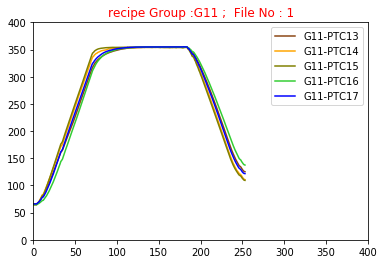

<Figure size 1600x1280 with 0 Axes>

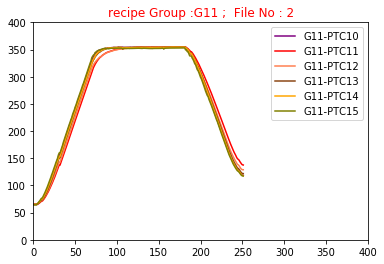

<Figure size 1600x1280 with 0 Axes>

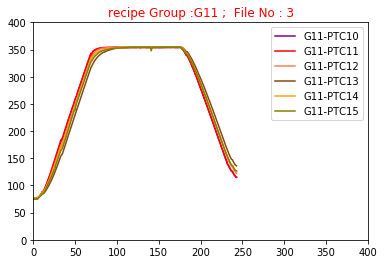

<Figure size 1600x1280 with 0 Axes>

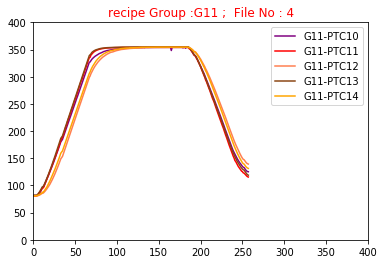

<Figure size 1600x1280 with 0 Axes>

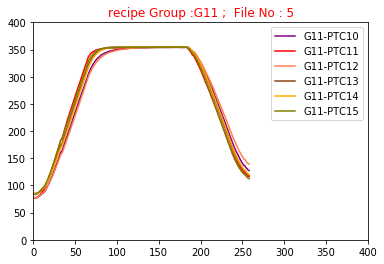

<Figure size 1600x1280 with 0 Axes>

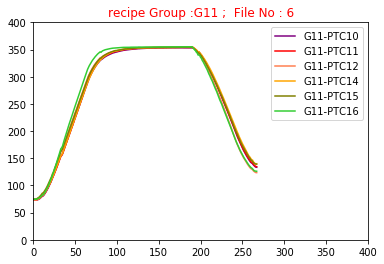

<Figure size 1600x1280 with 0 Axes>

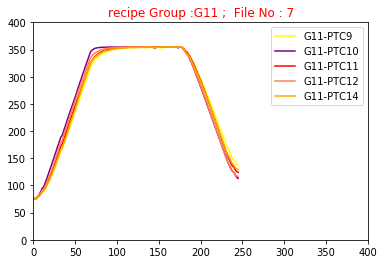

<Figure size 1600x1280 with 0 Axes>

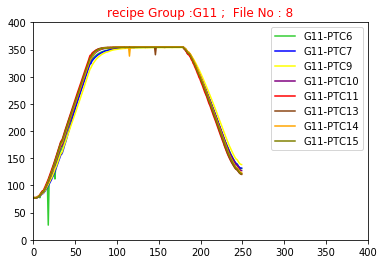

<Figure size 1600x1280 with 0 Axes>

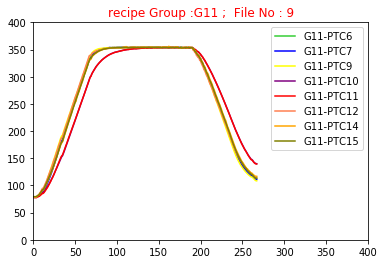

<Figure size 1600x1280 with 0 Axes>

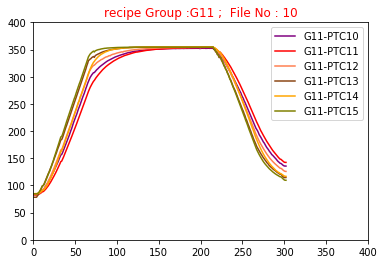

<Figure size 1600x1280 with 0 Axes>

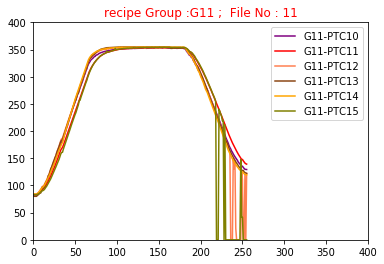

<Figure size 1600x1280 with 0 Axes>

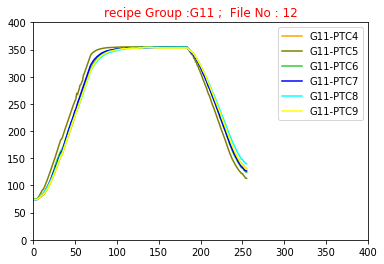

<Figure size 1600x1280 with 0 Axes>

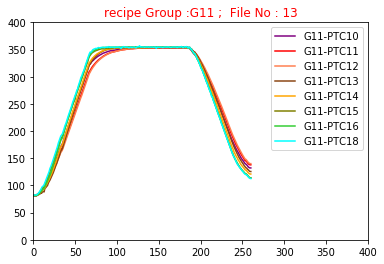

<Figure size 1600x1280 with 0 Axes>

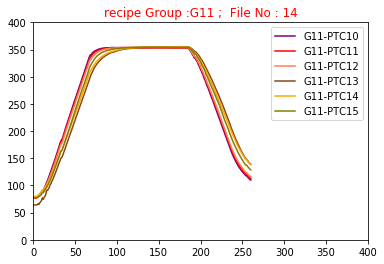

<Figure size 1600x1280 with 0 Axes>

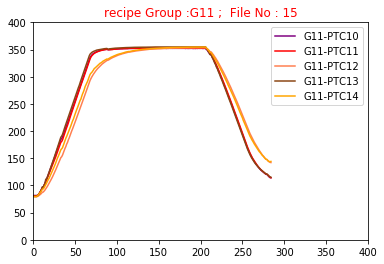

<Figure size 1600x1280 with 0 Axes>

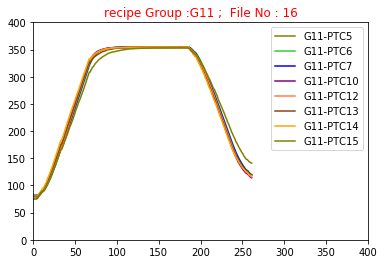

<Figure size 1600x1280 with 0 Axes>

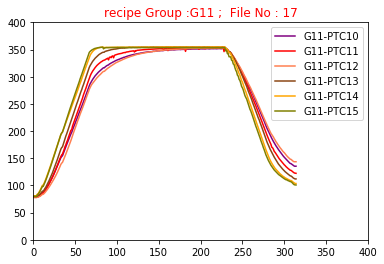

<Figure size 1600x1280 with 0 Axes>

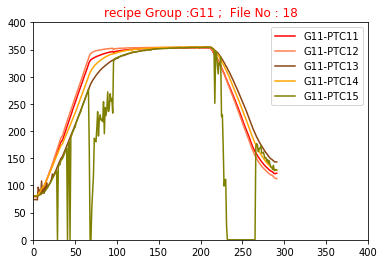

<Figure size 1600x1280 with 0 Axes>

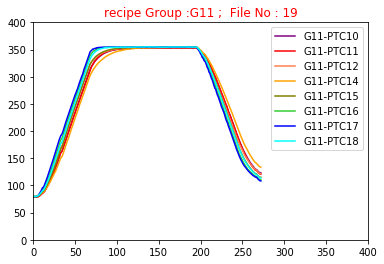

<Figure size 1600x1280 with 0 Axes>

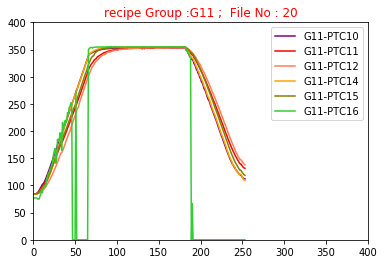

<Figure size 1600x1280 with 0 Axes>

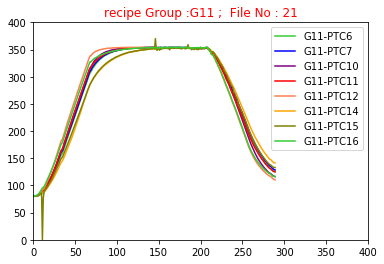

<Figure size 1600x1280 with 0 Axes>

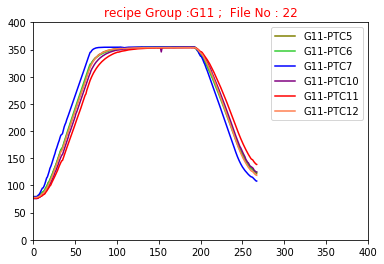

<Figure size 1600x1280 with 0 Axes>

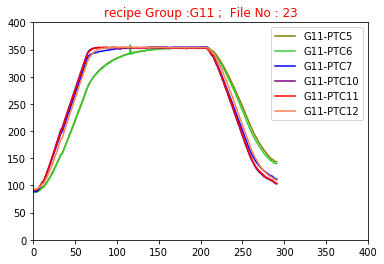

<Figure size 1600x1280 with 0 Axes>

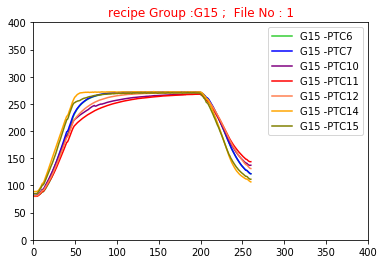

<Figure size 1600x1280 with 0 Axes>

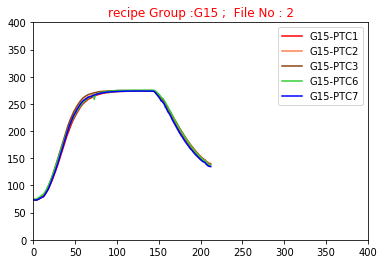

<Figure size 1600x1280 with 0 Axes>

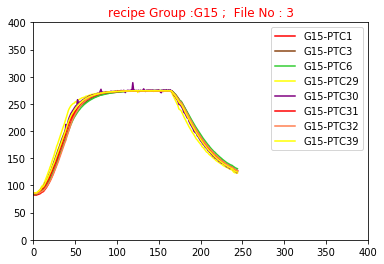

<Figure size 1600x1280 with 0 Axes>

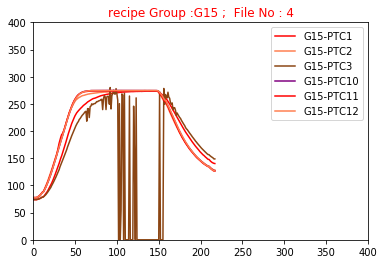

<Figure size 1600x1280 with 0 Axes>

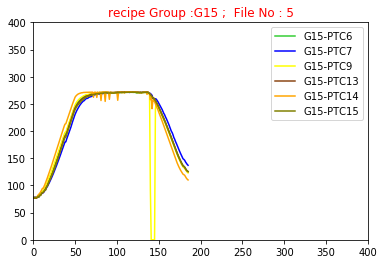

<Figure size 1600x1280 with 0 Axes>

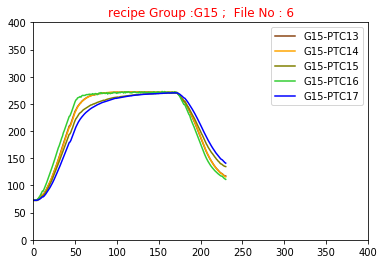

<Figure size 1600x1280 with 0 Axes>

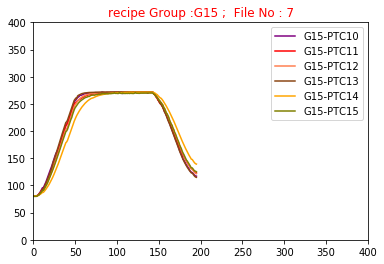

<Figure size 1600x1280 with 0 Axes>

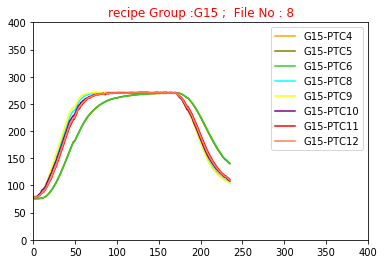

<Figure size 1600x1280 with 0 Axes>

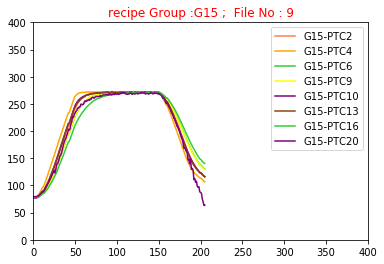

<Figure size 1600x1280 with 0 Axes>

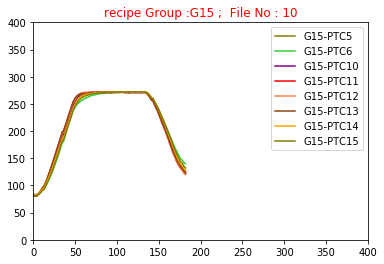

<Figure size 1600x1280 with 0 Axes>

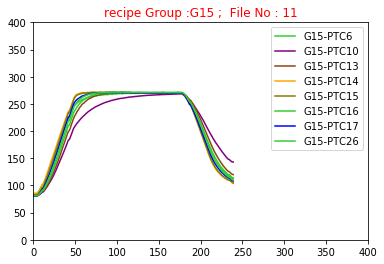

<Figure size 1600x1280 with 0 Axes>

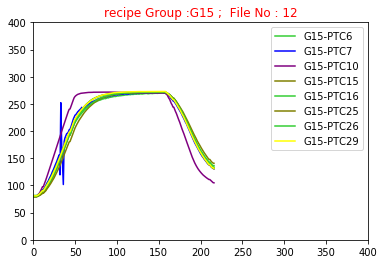

<Figure size 1600x1280 with 0 Axes>

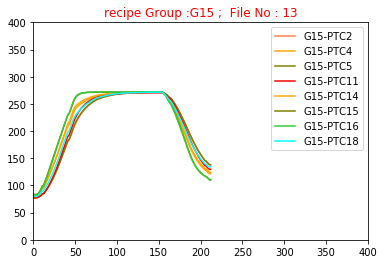

<Figure size 1600x1280 with 0 Axes>

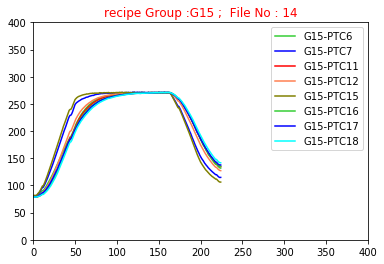

<Figure size 1600x1280 with 0 Axes>

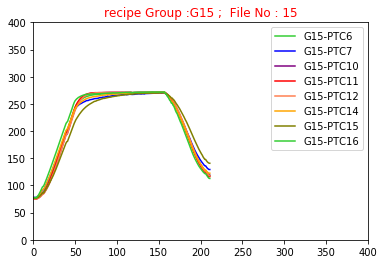

<Figure size 1600x1280 with 0 Axes>

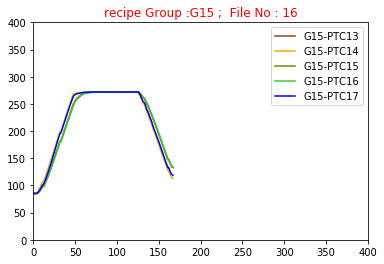

<Figure size 1600x1280 with 0 Axes>

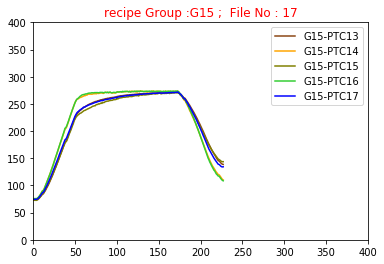

<Figure size 1600x1280 with 0 Axes>

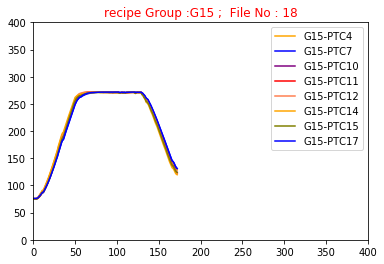

<Figure size 1600x1280 with 0 Axes>

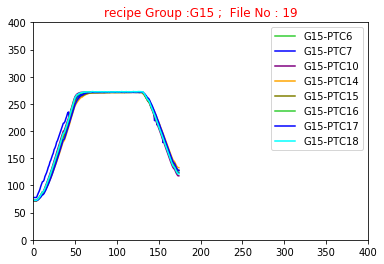

<Figure size 1600x1280 with 0 Axes>

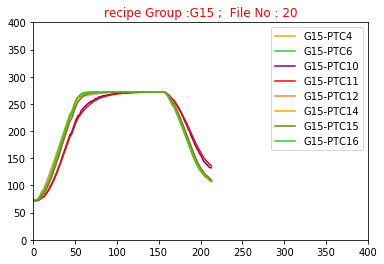

<Figure size 1600x1280 with 0 Axes>

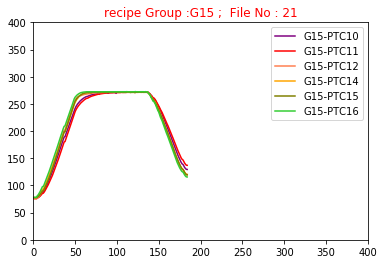

<Figure size 1600x1280 with 0 Axes>

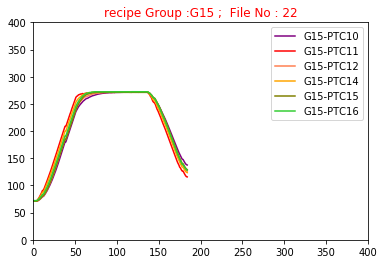

<Figure size 1600x1280 with 0 Axes>

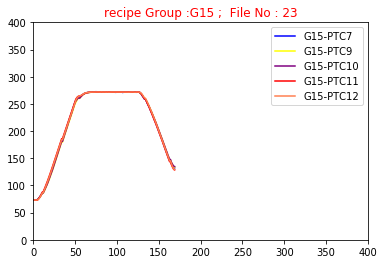

<Figure size 1600x1280 with 0 Axes>

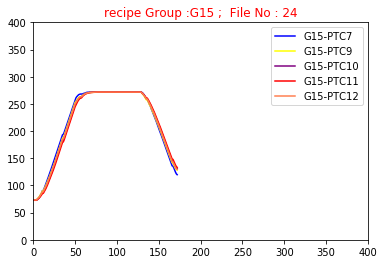

<Figure size 1600x1280 with 0 Axes>

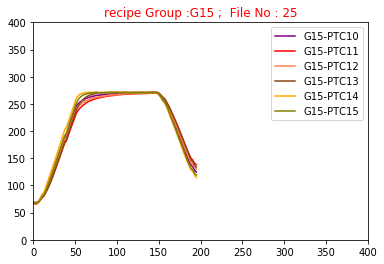

<Figure size 1600x1280 with 0 Axes>

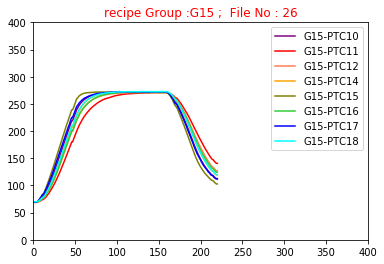

<Figure size 1600x1280 with 0 Axes>

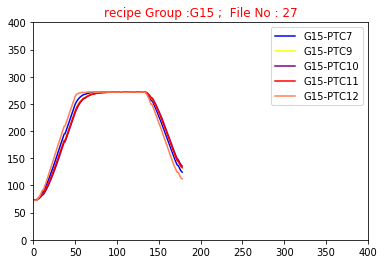

<Figure size 1600x1280 with 0 Axes>

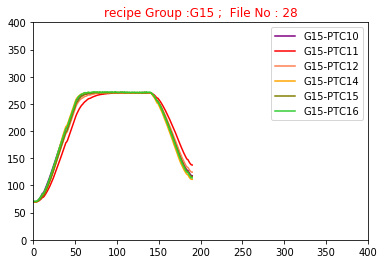

<Figure size 1600x1280 with 0 Axes>

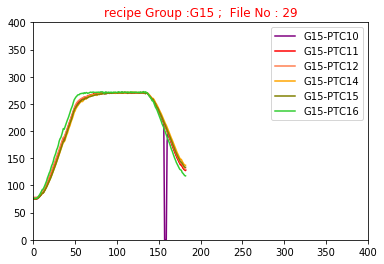

<Figure size 1600x1280 with 0 Axes>

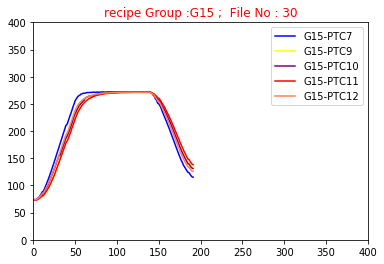

<Figure size 1600x1280 with 0 Axes>

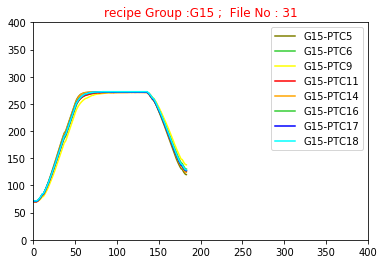

<Figure size 1600x1280 with 0 Axes>

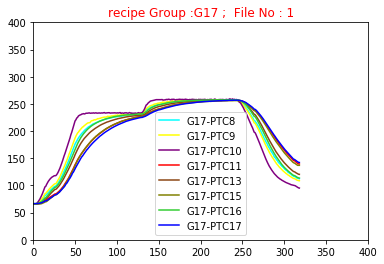

<Figure size 1600x1280 with 0 Axes>

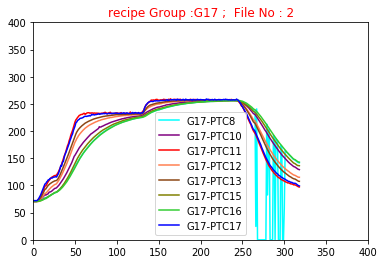

<Figure size 1600x1280 with 0 Axes>

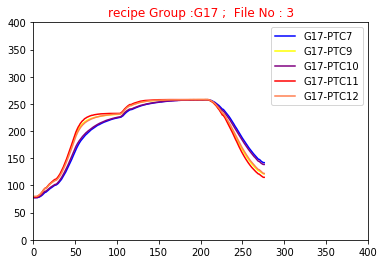

<Figure size 1600x1280 with 0 Axes>

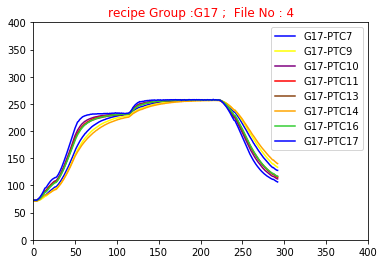

<Figure size 1600x1280 with 0 Axes>

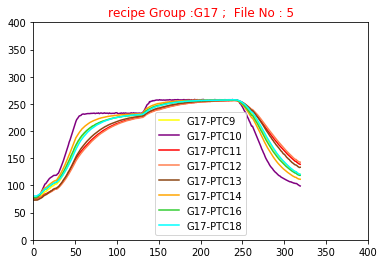

<Figure size 1600x1280 with 0 Axes>

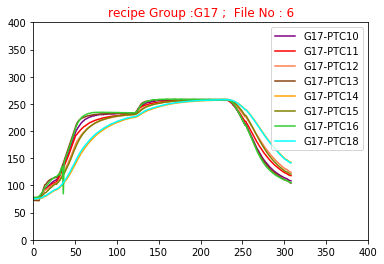

<Figure size 1600x1280 with 0 Axes>

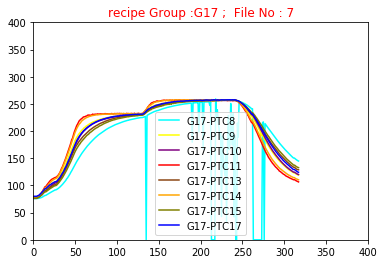

<Figure size 1600x1280 with 0 Axes>

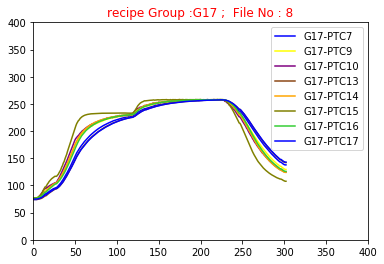

<Figure size 1600x1280 with 0 Axes>

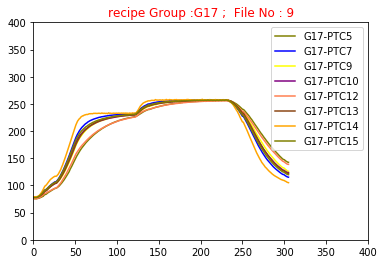

<Figure size 1600x1280 with 0 Axes>

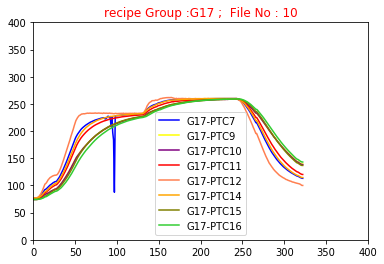

<Figure size 1600x1280 with 0 Axes>

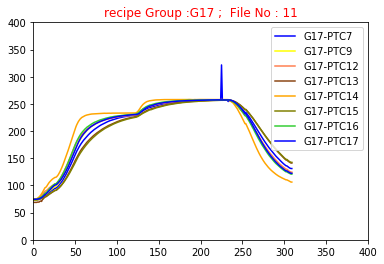

<Figure size 1600x1280 with 0 Axes>

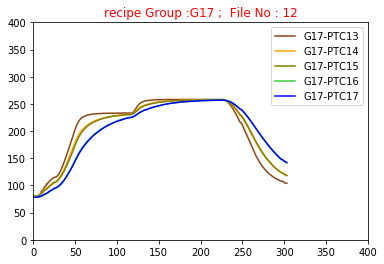

<Figure size 1600x1280 with 0 Axes>

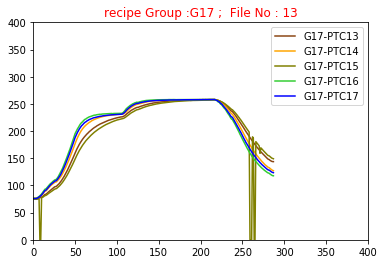

<Figure size 1600x1280 with 0 Axes>

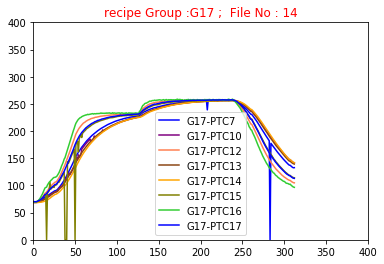

<Figure size 1600x1280 with 0 Axes>

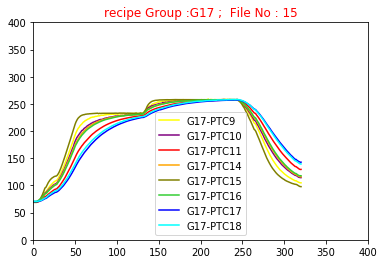

<Figure size 1600x1280 with 0 Axes>

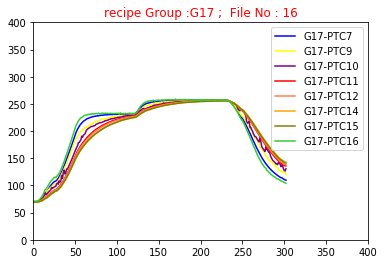

<Figure size 1600x1280 with 0 Axes>

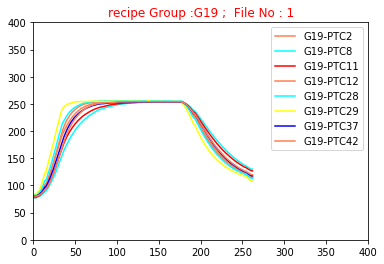

<Figure size 1600x1280 with 0 Axes>

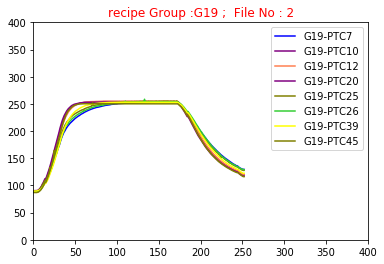

<Figure size 1600x1280 with 0 Axes>

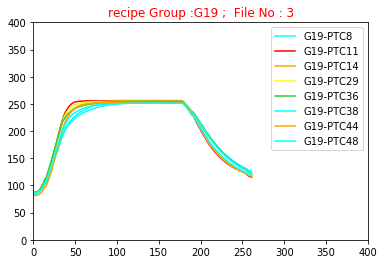

<Figure size 1600x1280 with 0 Axes>

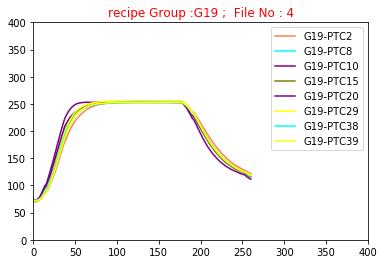

<Figure size 1600x1280 with 0 Axes>

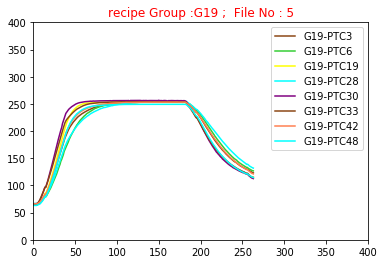

<Figure size 1600x1280 with 0 Axes>

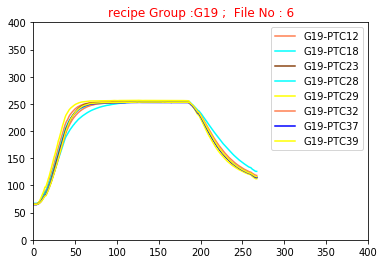

<Figure size 1600x1280 with 0 Axes>

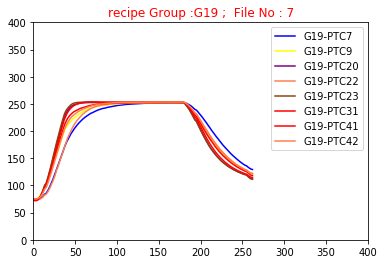

<Figure size 1600x1280 with 0 Axes>

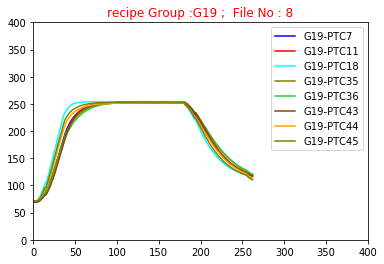

<Figure size 1600x1280 with 0 Axes>

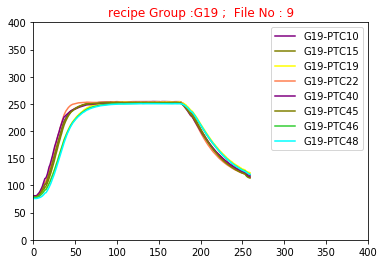

<Figure size 1600x1280 with 0 Axes>

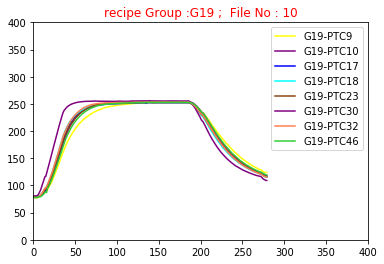

<Figure size 1600x1280 with 0 Axes>

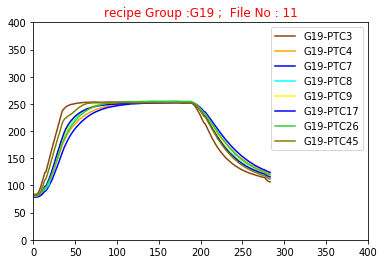

<Figure size 1600x1280 with 0 Axes>

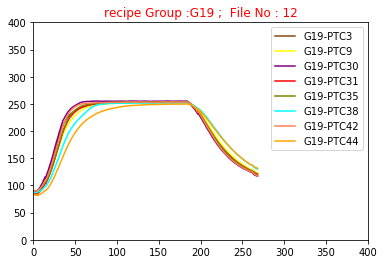

<Figure size 1600x1280 with 0 Axes>

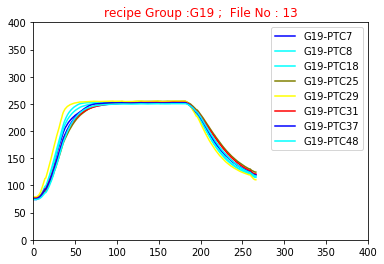

<Figure size 1600x1280 with 0 Axes>

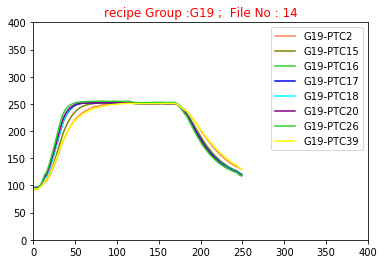

<Figure size 1600x1280 with 0 Axes>

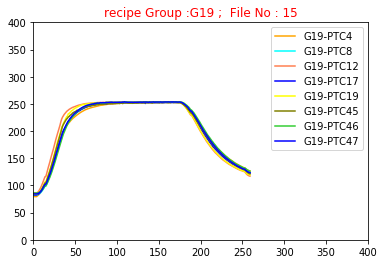

<Figure size 1600x1280 with 0 Axes>

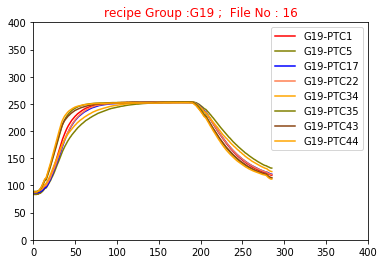

<Figure size 1600x1280 with 0 Axes>

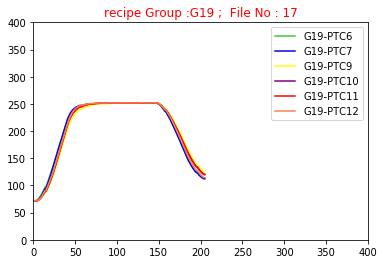

<Figure size 1600x1280 with 0 Axes>

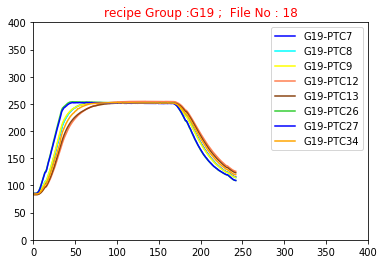

<Figure size 1600x1280 with 0 Axes>

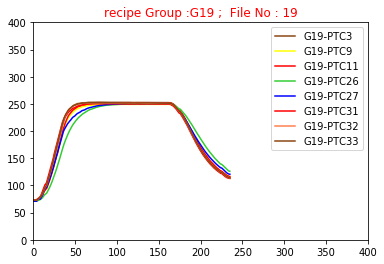

<Figure size 1600x1280 with 0 Axes>

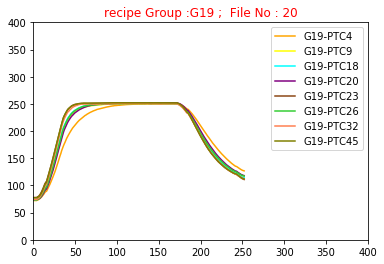

<Figure size 1600x1280 with 0 Axes>

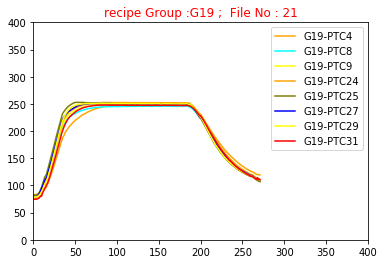

<Figure size 1600x1280 with 0 Axes>

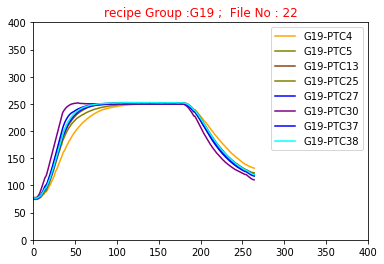

<Figure size 1600x1280 with 0 Axes>

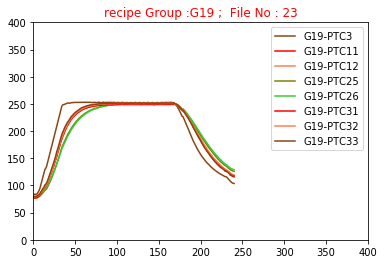

<Figure size 1600x1280 with 0 Axes>

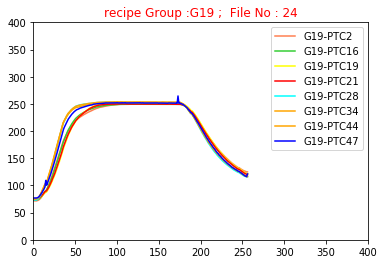

<Figure size 1600x1280 with 0 Axes>

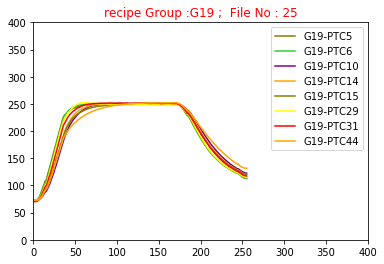

<Figure size 1600x1280 with 0 Axes>

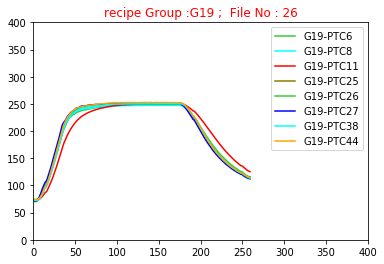

<Figure size 1600x1280 with 0 Axes>

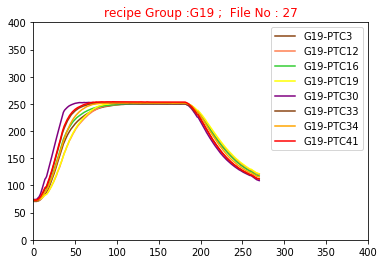

<Figure size 1600x1280 with 0 Axes>

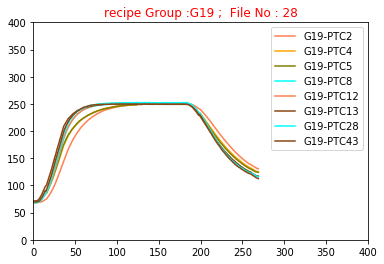

<Figure size 1600x1280 with 0 Axes>

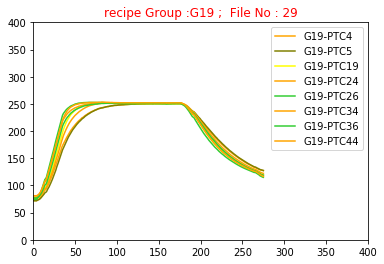

<Figure size 1600x1280 with 0 Axes>

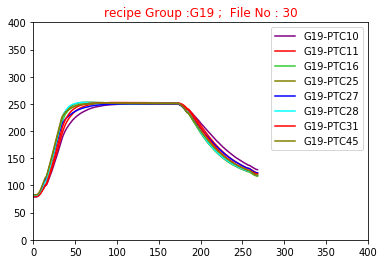

<Figure size 1600x1280 with 0 Axes>

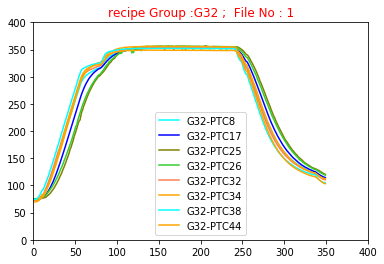

<Figure size 1600x1280 with 0 Axes>

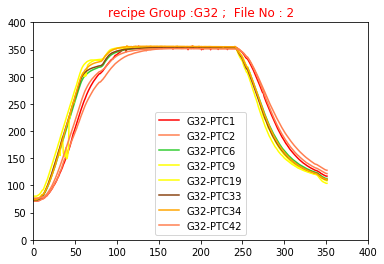

<Figure size 1600x1280 with 0 Axes>

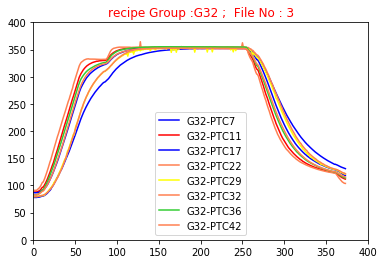

<Figure size 1600x1280 with 0 Axes>

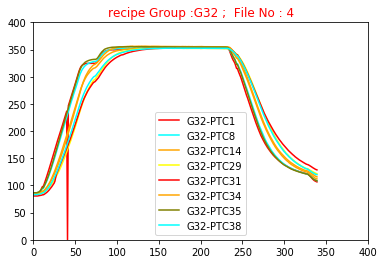

<Figure size 1600x1280 with 0 Axes>

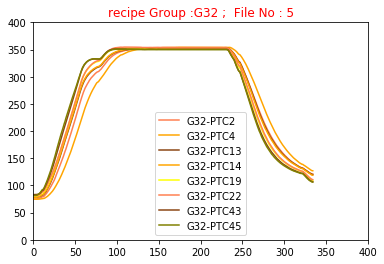

<Figure size 1600x1280 with 0 Axes>

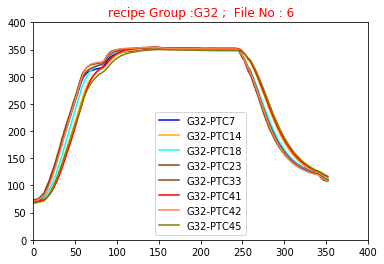

<Figure size 1600x1280 with 0 Axes>

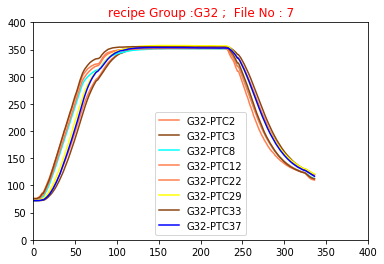

<Figure size 1600x1280 with 0 Axes>

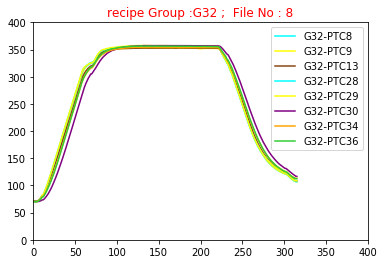

<Figure size 1600x1280 with 0 Axes>

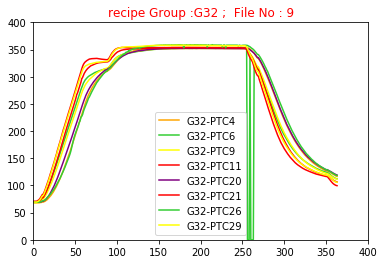

<Figure size 1600x1280 with 0 Axes>

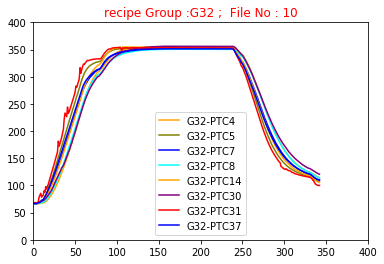

<Figure size 1600x1280 with 0 Axes>

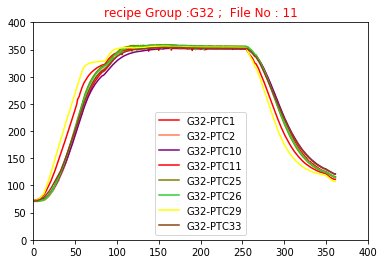

<Figure size 1600x1280 with 0 Axes>

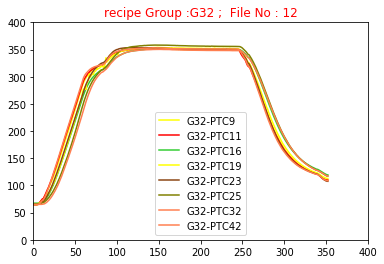

<Figure size 1600x1280 with 0 Axes>

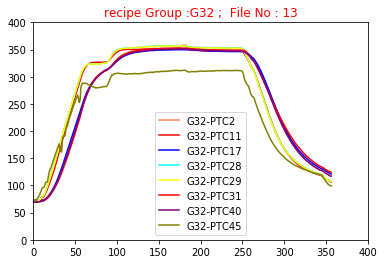

<Figure size 1600x1280 with 0 Axes>

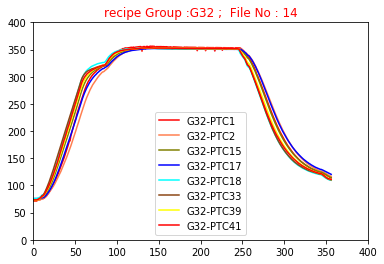

<Figure size 1600x1280 with 0 Axes>

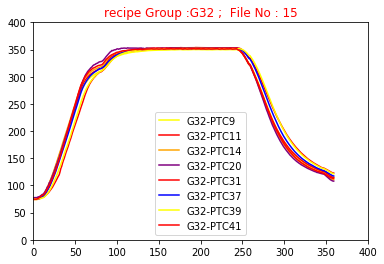

<Figure size 1600x1280 with 0 Axes>

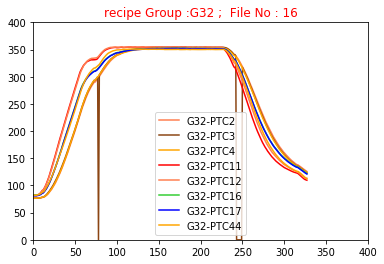

<Figure size 1600x1280 with 0 Axes>

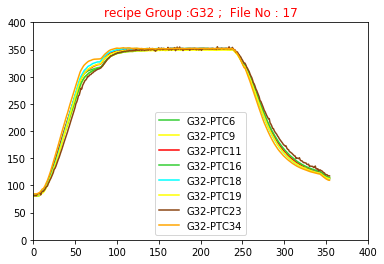

<Figure size 1600x1280 with 0 Axes>

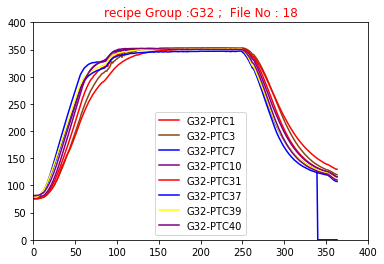

<Figure size 1600x1280 with 0 Axes>

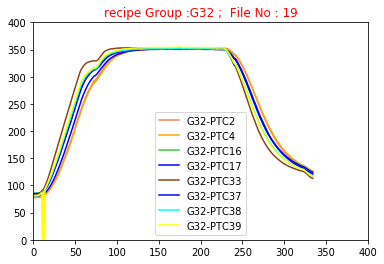

<Figure size 1600x1280 with 0 Axes>

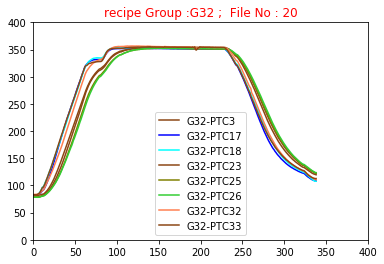

<Figure size 1600x1280 with 0 Axes>

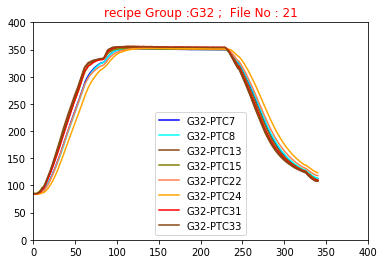

<Figure size 1600x1280 with 0 Axes>

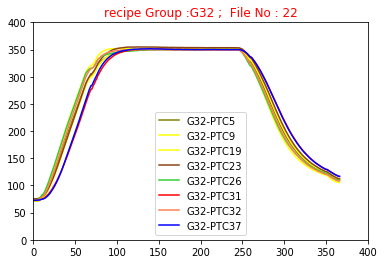

<Figure size 1600x1280 with 0 Axes>

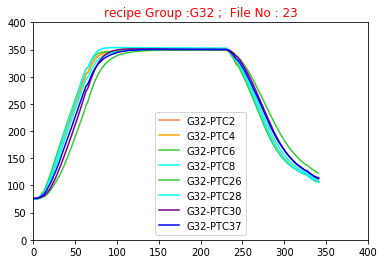

<Figure size 1600x1280 with 0 Axes>

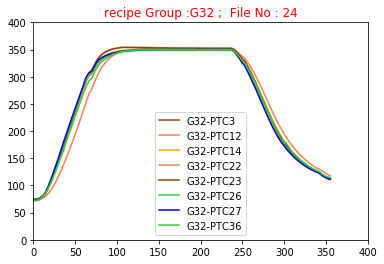

<Figure size 1600x1280 with 0 Axes>

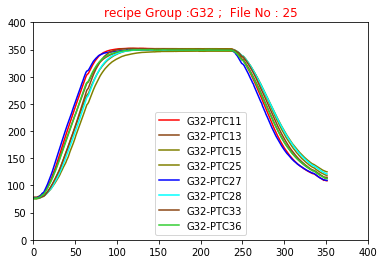

<Figure size 1600x1280 with 0 Axes>

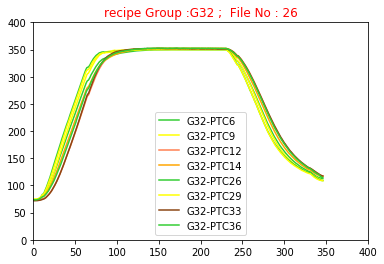

<Figure size 1600x1280 with 0 Axes>

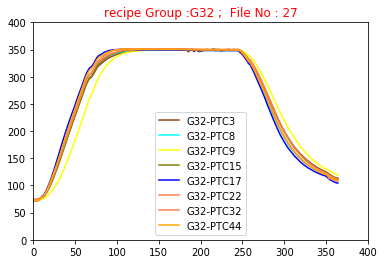

<Figure size 1600x1280 with 0 Axes>

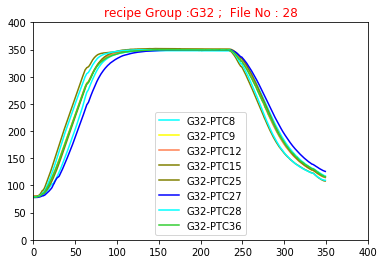

<Figure size 1600x1280 with 0 Axes>

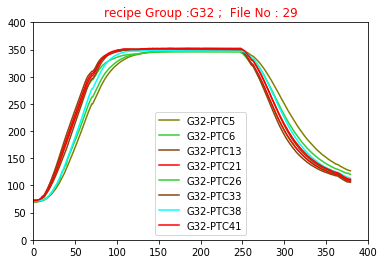

<Figure size 1600x1280 with 0 Axes>

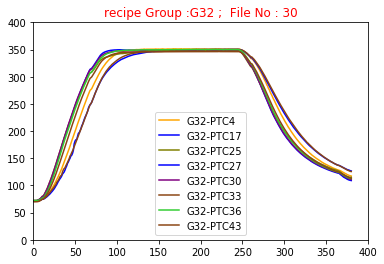

<Figure size 1600x1280 with 0 Axes>

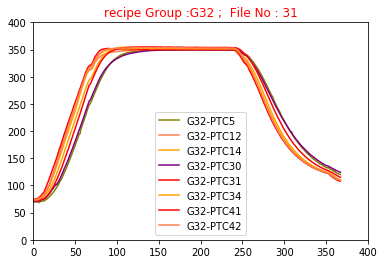

<Figure size 1600x1280 with 0 Axes>

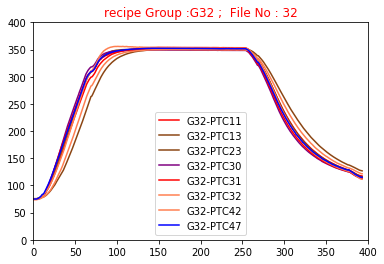

<Figure size 1600x1280 with 0 Axes>

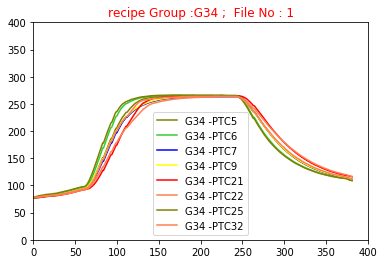

<Figure size 1600x1280 with 0 Axes>

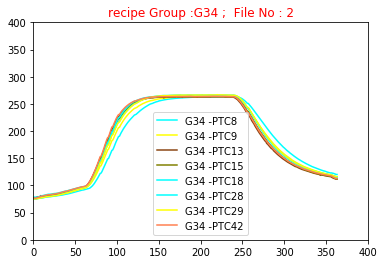

<Figure size 1600x1280 with 0 Axes>

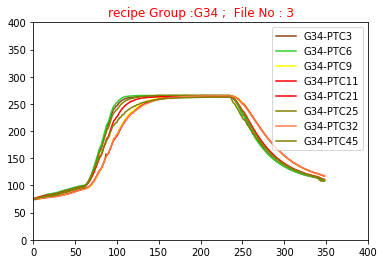

<Figure size 1600x1280 with 0 Axes>

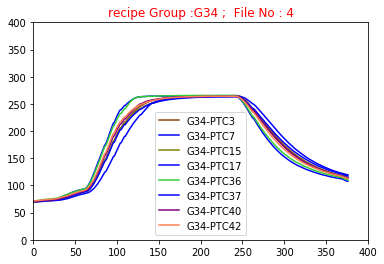

<Figure size 1600x1280 with 0 Axes>

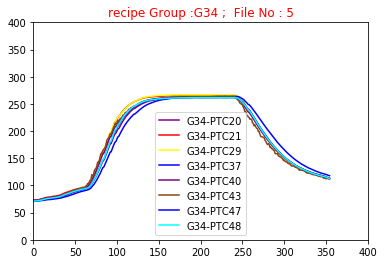

<Figure size 1600x1280 with 0 Axes>

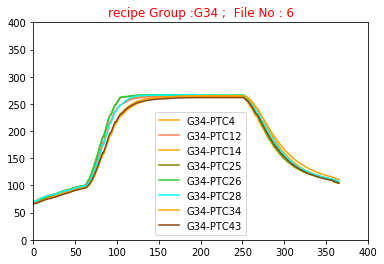

<Figure size 1600x1280 with 0 Axes>

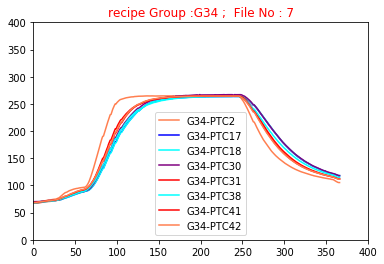

<Figure size 1600x1280 with 0 Axes>

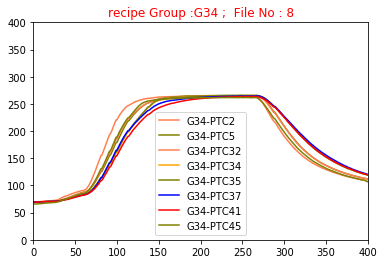

<Figure size 1600x1280 with 0 Axes>

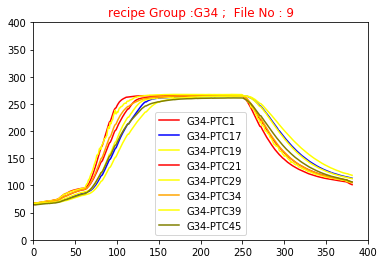

<Figure size 1600x1280 with 0 Axes>

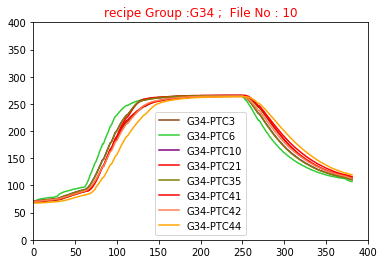

<Figure size 1600x1280 with 0 Axes>

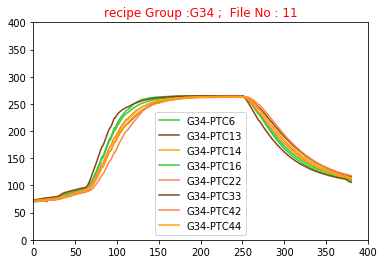

<Figure size 1600x1280 with 0 Axes>

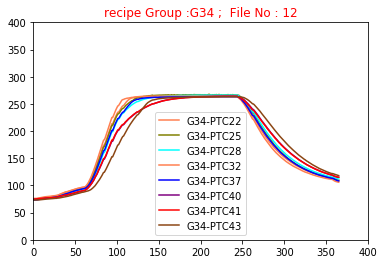

<Figure size 1600x1280 with 0 Axes>

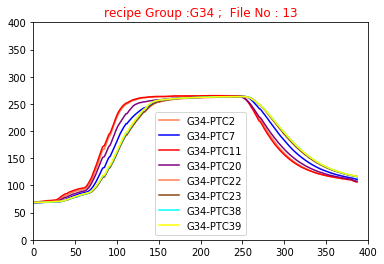

<Figure size 1600x1280 with 0 Axes>

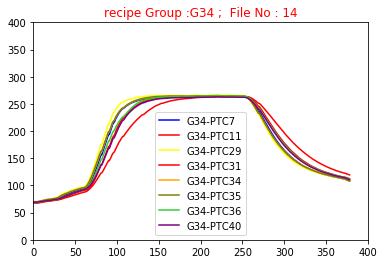

<Figure size 1600x1280 with 0 Axes>

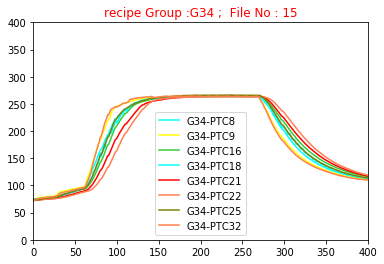

<Figure size 1600x1280 with 0 Axes>

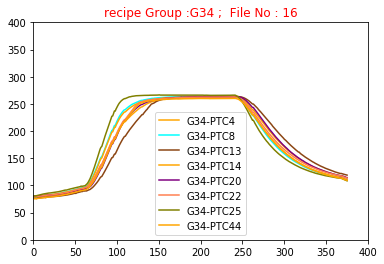

<Figure size 1600x1280 with 0 Axes>

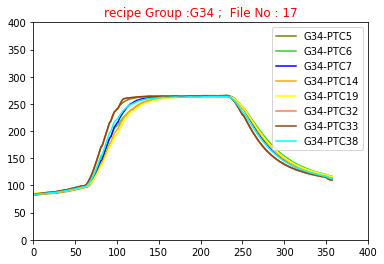

<Figure size 1600x1280 with 0 Axes>

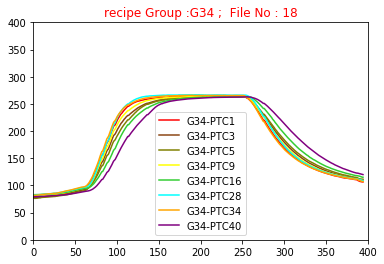

<Figure size 1600x1280 with 0 Axes>

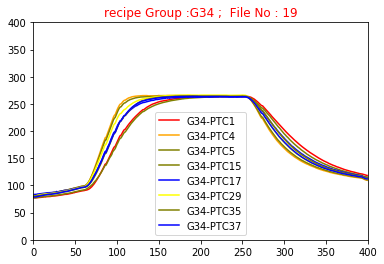

<Figure size 1600x1280 with 0 Axes>

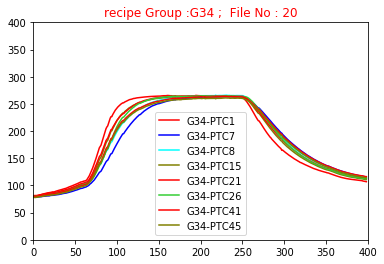

<Figure size 1600x1280 with 0 Axes>

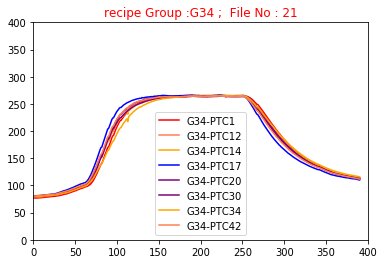

<Figure size 1600x1280 with 0 Axes>

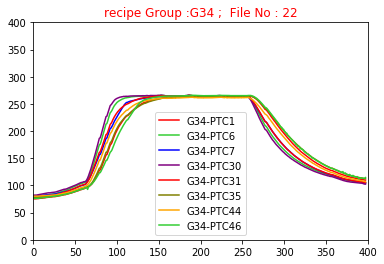

<Figure size 1600x1280 with 0 Axes>

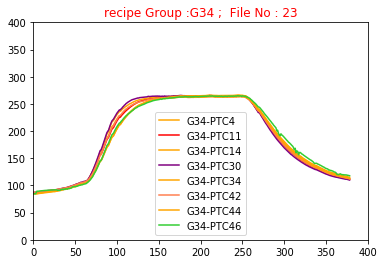

<Figure size 1600x1280 with 0 Axes>

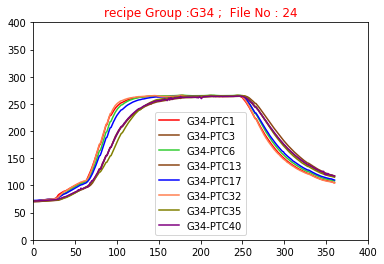

<Figure size 1600x1280 with 0 Axes>

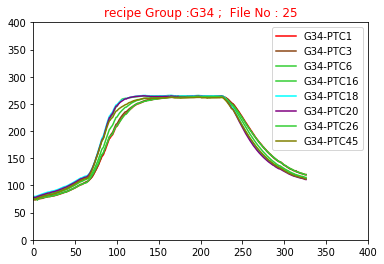

<Figure size 1600x1280 with 0 Axes>

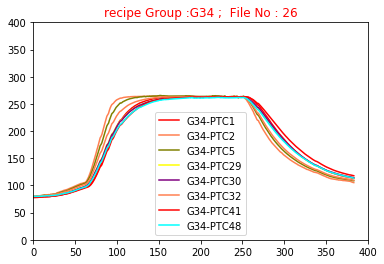

<Figure size 1600x1280 with 0 Axes>

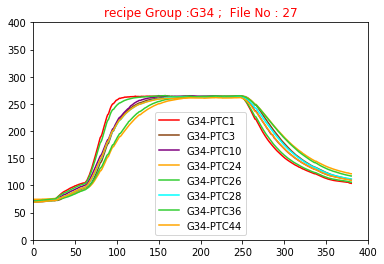

<Figure size 1600x1280 with 0 Axes>

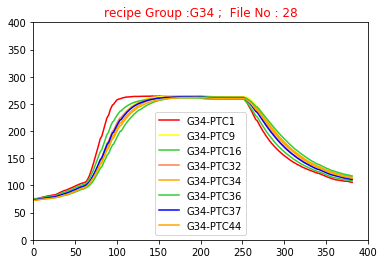

<Figure size 1600x1280 with 0 Axes>

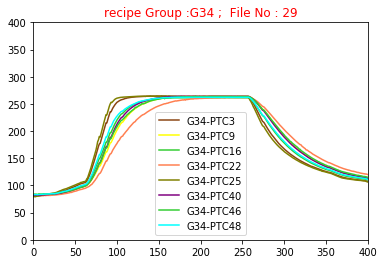

<Figure size 1600x1280 with 0 Axes>

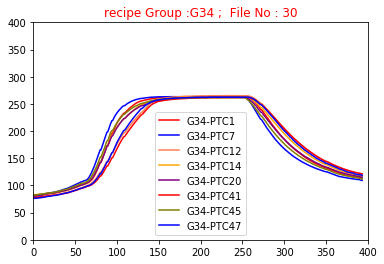

<Figure size 1600x1280 with 0 Axes>

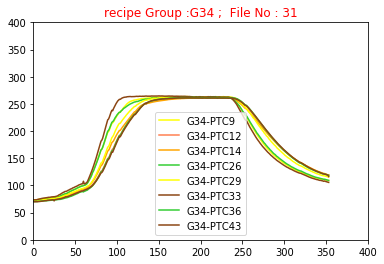

<Figure size 1600x1280 with 0 Axes>

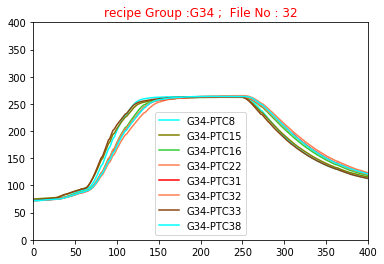

<Figure size 1600x1280 with 0 Axes>

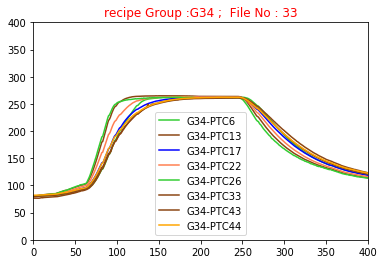

<Figure size 1600x1280 with 0 Axes>

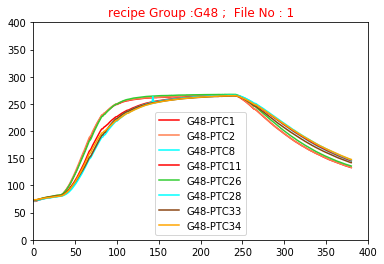

<Figure size 1600x1280 with 0 Axes>

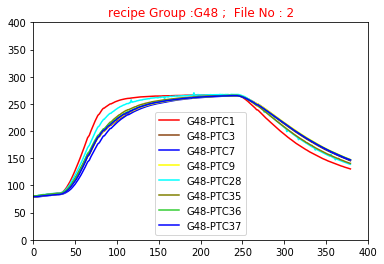

<Figure size 1600x1280 with 0 Axes>

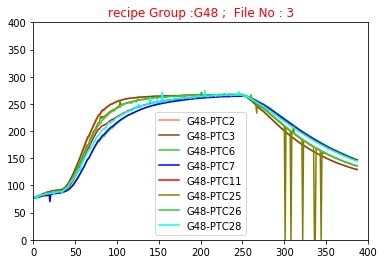

<Figure size 1600x1280 with 0 Axes>

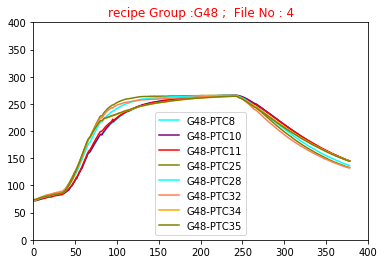

<Figure size 1600x1280 with 0 Axes>

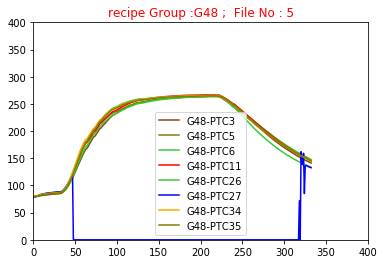

<Figure size 1600x1280 with 0 Axes>

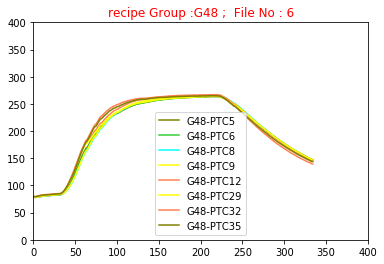

<Figure size 1600x1280 with 0 Axes>

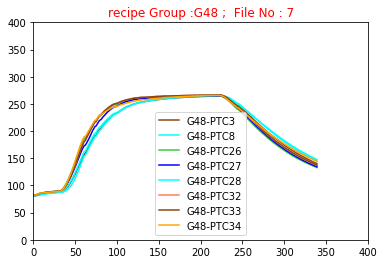

<Figure size 1600x1280 with 0 Axes>

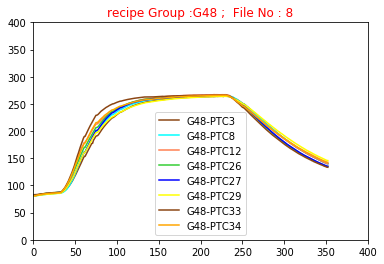

<Figure size 1600x1280 with 0 Axes>

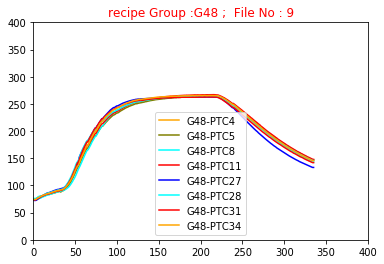

<Figure size 1600x1280 with 0 Axes>

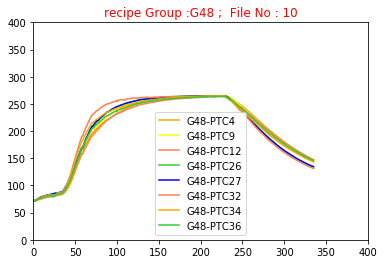

<Figure size 1600x1280 with 0 Axes>

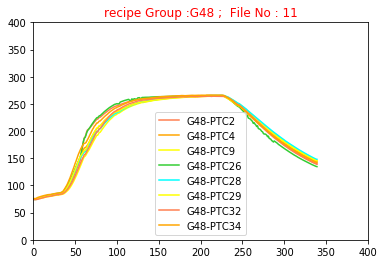

<Figure size 1600x1280 with 0 Axes>

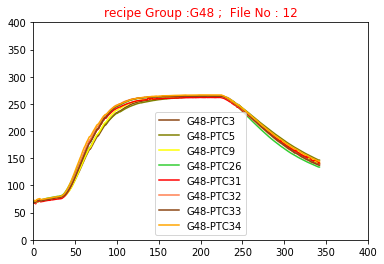

<Figure size 1600x1280 with 0 Axes>

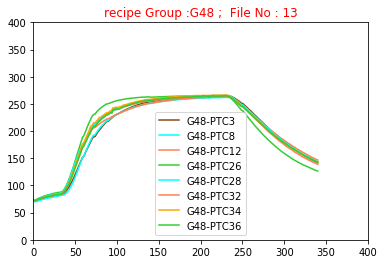

<Figure size 1600x1280 with 0 Axes>

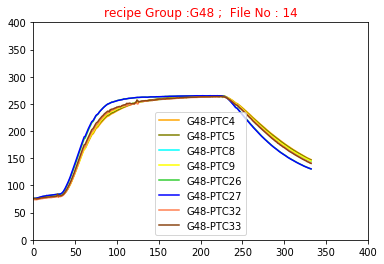

<Figure size 1600x1280 with 0 Axes>

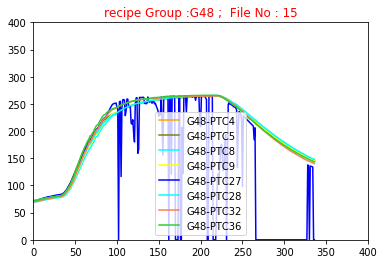

<Figure size 1600x1280 with 0 Axes>

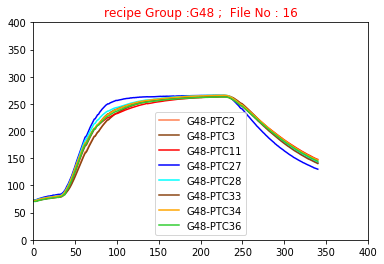

<Figure size 1600x1280 with 0 Axes>

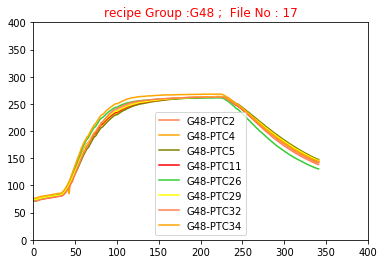

<Figure size 1600x1280 with 0 Axes>

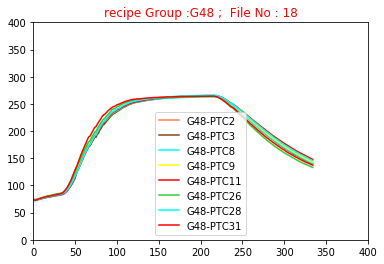

<Figure size 1600x1280 with 0 Axes>

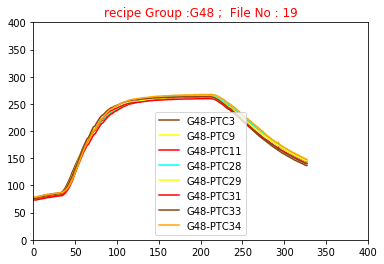

<Figure size 1600x1280 with 0 Axes>

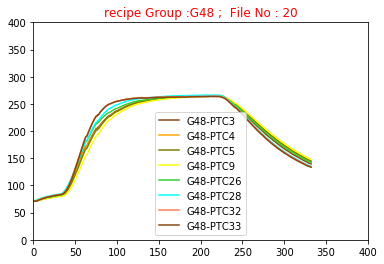

<Figure size 1600x1280 with 0 Axes>

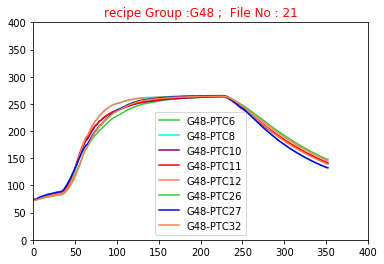

<Figure size 1600x1280 with 0 Axes>

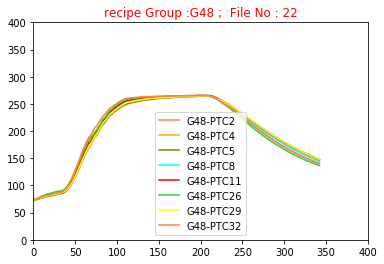

<Figure size 1600x1280 with 0 Axes>

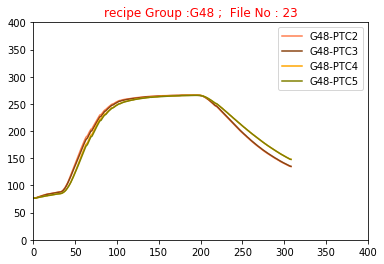

<Figure size 1600x1280 with 0 Axes>

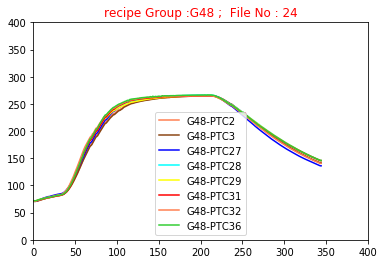

<Figure size 1600x1280 with 0 Axes>

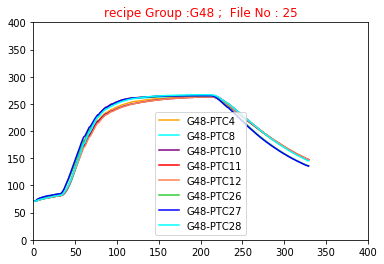

<Figure size 1600x1280 with 0 Axes>

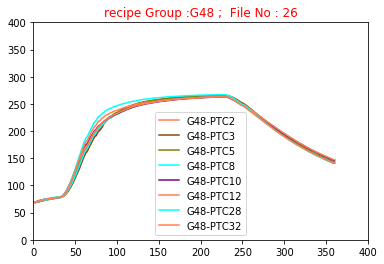

<Figure size 1600x1280 with 0 Axes>

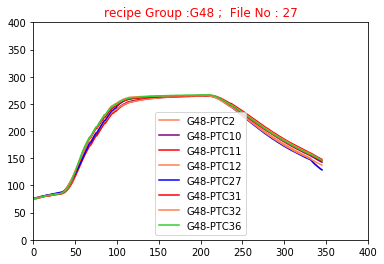

<Figure size 1600x1280 with 0 Axes>

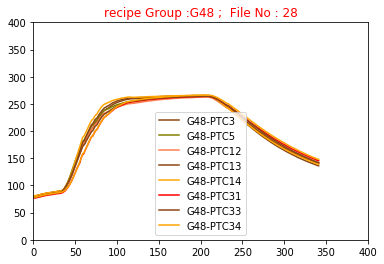

<Figure size 1600x1280 with 0 Axes>

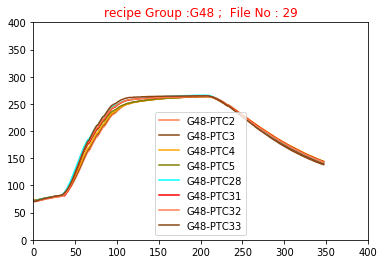

<Figure size 1600x1280 with 0 Axes>

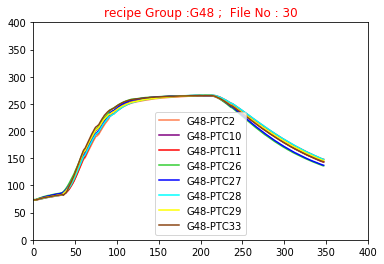

<Figure size 1600x1280 with 0 Axes>

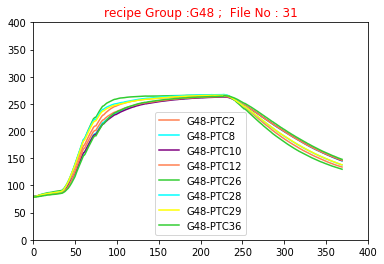

<Figure size 1600x1280 with 0 Axes>

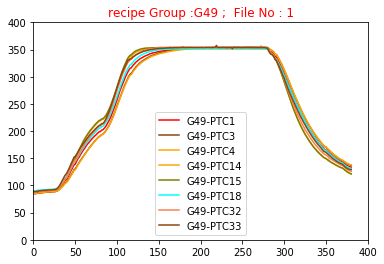

<Figure size 1600x1280 with 0 Axes>

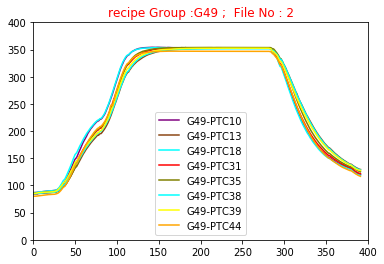

<Figure size 1600x1280 with 0 Axes>

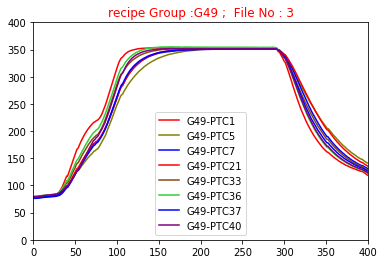

<Figure size 1600x1280 with 0 Axes>

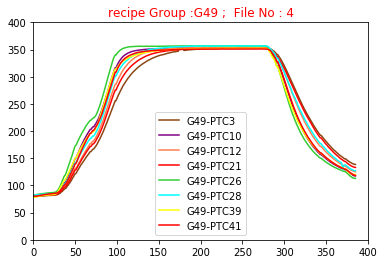

<Figure size 1600x1280 with 0 Axes>

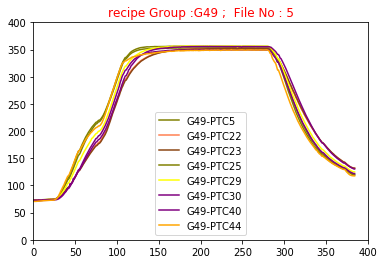

<Figure size 1600x1280 with 0 Axes>

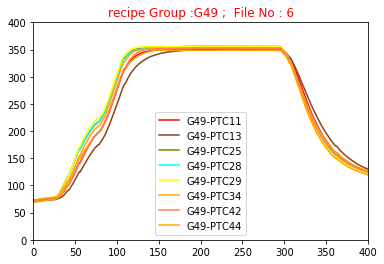

<Figure size 1600x1280 with 0 Axes>

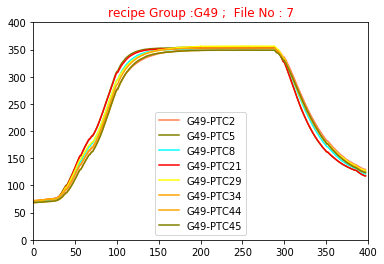

<Figure size 1600x1280 with 0 Axes>

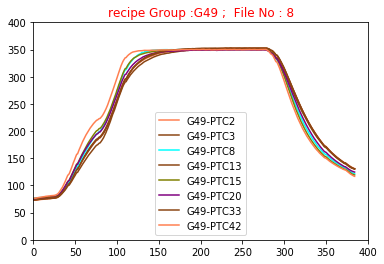

<Figure size 1600x1280 with 0 Axes>

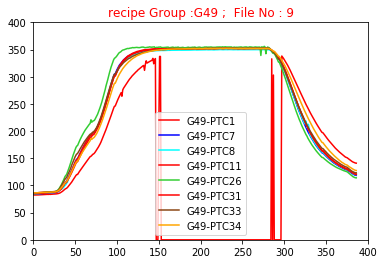

<Figure size 1600x1280 with 0 Axes>

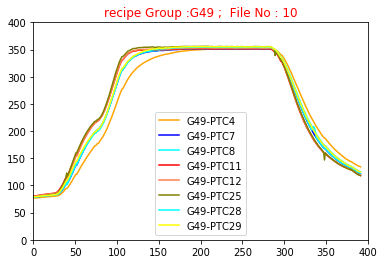

<Figure size 1600x1280 with 0 Axes>

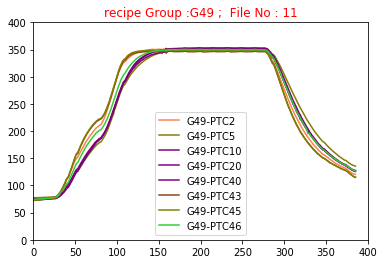

<Figure size 1600x1280 with 0 Axes>

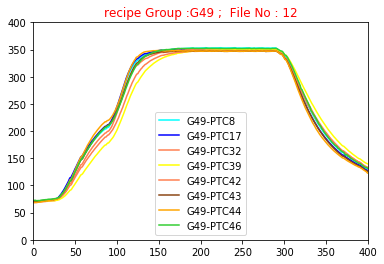

<Figure size 1600x1280 with 0 Axes>

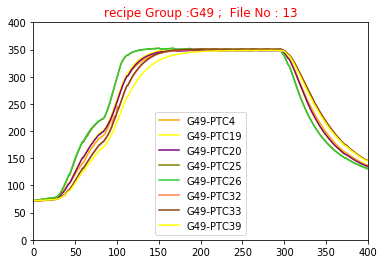

<Figure size 1600x1280 with 0 Axes>

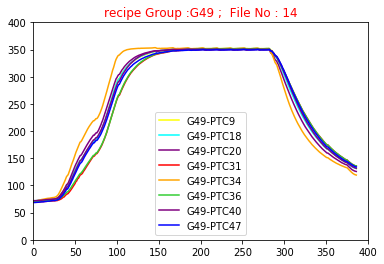

<Figure size 1600x1280 with 0 Axes>

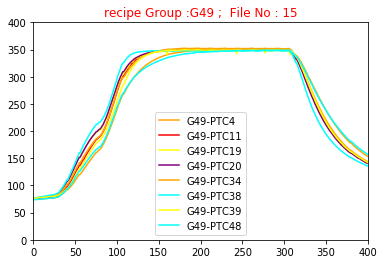

<Figure size 1600x1280 with 0 Axes>

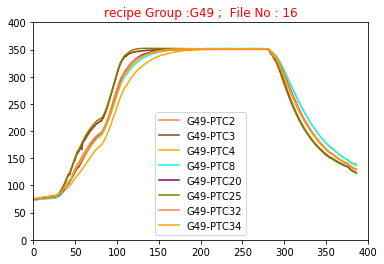

<Figure size 1600x1280 with 0 Axes>

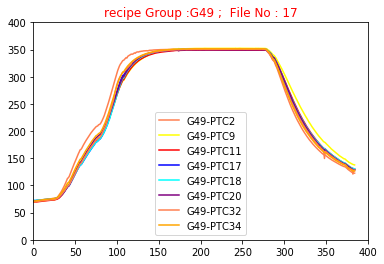

<Figure size 1600x1280 with 0 Axes>

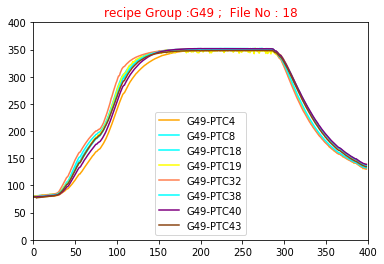

<Figure size 1600x1280 with 0 Axes>

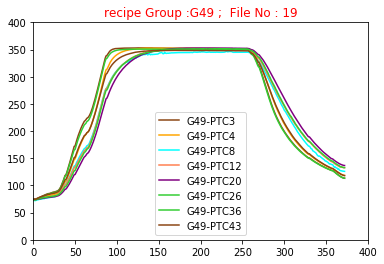

<Figure size 1600x1280 with 0 Axes>

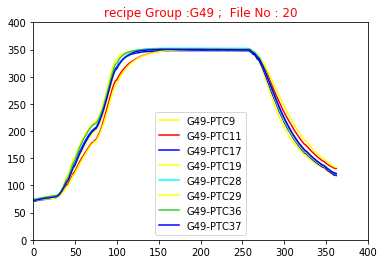

<Figure size 1600x1280 with 0 Axes>

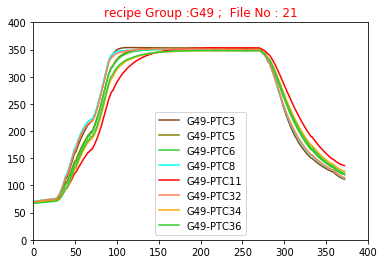

<Figure size 1600x1280 with 0 Axes>

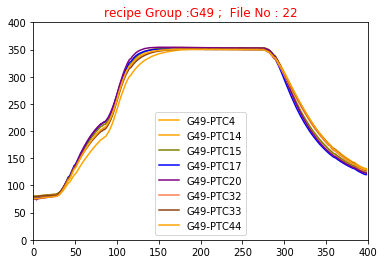

<Figure size 1600x1280 with 0 Axes>

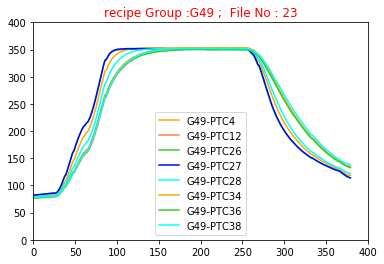

<Figure size 1600x1280 with 0 Axes>

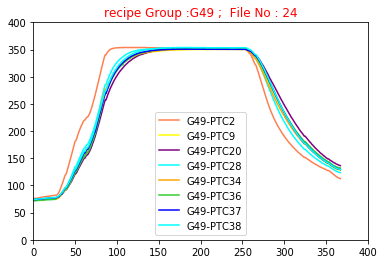

<Figure size 1600x1280 with 0 Axes>

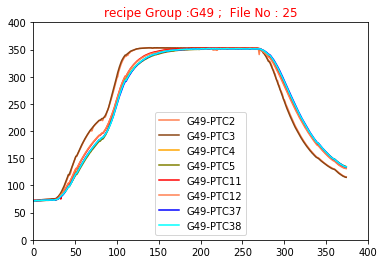

<Figure size 1600x1280 with 0 Axes>

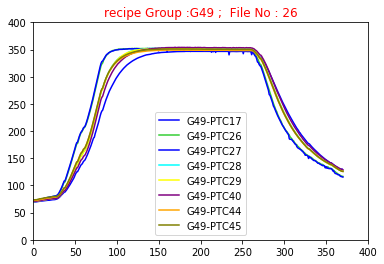

<Figure size 1600x1280 with 0 Axes>

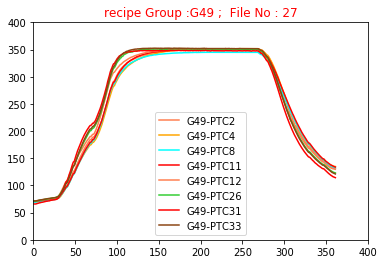

<Figure size 1600x1280 with 0 Axes>

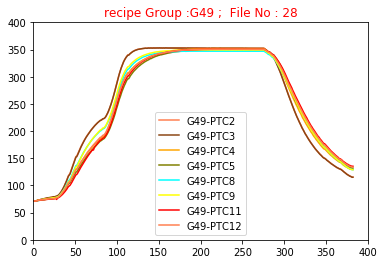

<Figure size 1600x1280 with 0 Axes>

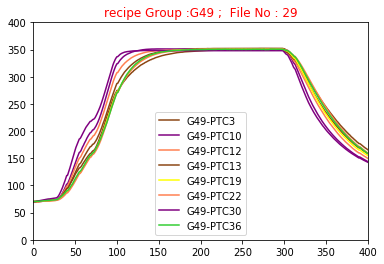

<Figure size 1600x1280 with 0 Axes>

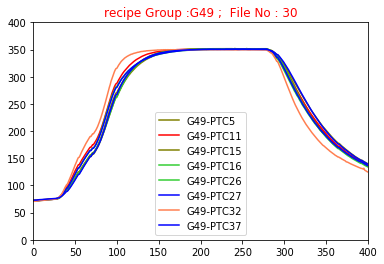

<Figure size 1600x1280 with 0 Axes>

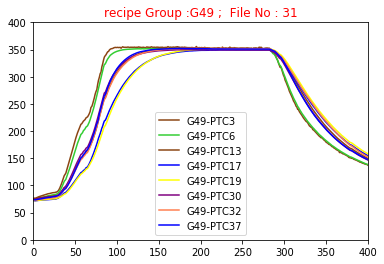

<Figure size 1600x1280 with 0 Axes>

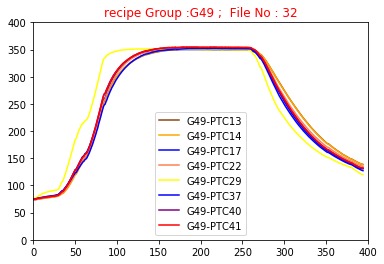

<Figure size 1600x1280 with 0 Axes>

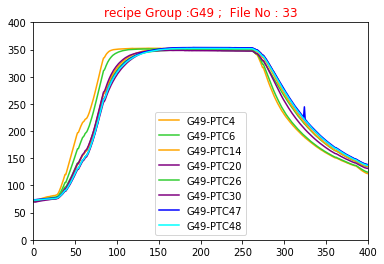

<Figure size 1600x1280 with 0 Axes>

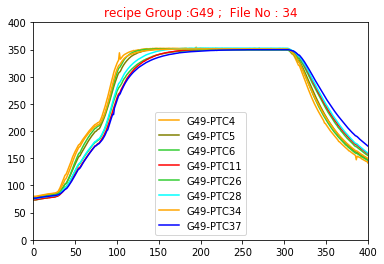

In [15]:
for i in range(len(recipeGroup)):
  
  aRecipeGroupFileList = getRecipeGroupFileList(recipeGroup[i])
                                                
  for j in range(len(aRecipeGroupFileList)):     
  
    df = readRecipeGroupFile(aRecipeGroupFileList[j])
    
    plotRecipeGroupFileCurve(df,recipeGroup[i], str(j+1))

## (*****) Classification Model Build

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

### KNN Model

In [17]:
# df=df.values (dataframe to array)
rgdf_data = rgdf.drop(['filename','groupid','eqpid','PTCno','sno'], axis = 1)
rgdf_target = rgdf['groupid'].values

In [18]:
rgdf_data

date count        mean         std   min       Q1      Q2       Q3  \
0     20160126   253  271.104743   94.558720  65.9  191.300  320.80  353.400   
1     20160126   253  271.828458   96.116089  65.8  190.800  325.90  353.800   
2     20160126   253  272.294071   96.935732  64.2  190.400  328.00  353.900   
3     20160126   253  270.937549   96.390320  64.9  193.700  321.00  354.200   
4     20160126   253  271.394071   95.907986  66.0  189.900  324.50  354.500   
5     20160311   251  271.496414   96.950474  64.9  190.050  325.00  354.000   
6     20160311   251  270.369323   96.234398  65.2  191.250  320.10  353.550   
7     20160311   251  269.253386   96.474155  65.3  188.050  319.40  353.250   
8     20160311   251  270.966534   97.058405  65.2  189.150  324.30  353.900   
9     20160311   251  270.822709   96.979874  65.0  188.700  324.20  353.600   
10    20160311   251  270.795219   95.908611  64.3  189.550  323.90  352.100   
11    20160428   243  274.605350   94.202147  75.3  195.950  328.90  353.700   
12    20160428   243  275.218930   93.810013  75.1  197.400  329.30  353.900   
13    20160428   243  275.394239   93.652418  75.8  198.200  328.50  354.100   
14    20160428   243  273.197119   93.926904  76.6  195.700  323.00  354.100   
15    20160428   243  274.696708   93.467222  76.0  197.100  327.30  354.300   
16    20160428   243  273.188889   93.970479  74.4  194.200  324.10  353.750   
17    20160509   257  276.105447   90.766808  81.5  198.300  329.00  353.100   
18    20160509   257  276.342412   93.050053  80.4  196.300  333.90  353.900   
19    20160509   257  273.277043   92.617352  80.5  194.600  322.00  352.600   
20    20160509   257  278.277821   91.960474  82.0  200.600  335.60  354.600   
21    20160509   257  274.282490   92.621636  81.1  195.100  324.30  353.400   
22    20160511   258  273.026357   93.075181  77.5  193.850  323.60  352.700   
23    20160511   258  275.516667   93.810080  77.4  195.175  332.40  353.700   
24    20160511   258  273.703876   91.688239  77.5  196.925  321.75  352.650   
25    20160511   258  275.922868   93.082210  85.4  195.700  329.50  354.500   
26    20160511   258  275.451550   92.877829  85.0  194.100  328.65  354.300   
27    20160511   258  275.148837   93.476840  83.5  194.200  330.75  353.900   
28    20160517   267  271.571161   92.764518  73.1  193.300  320.10  351.550   
29    20160517   267  272.355056   92.855805  73.5  193.550  321.20  352.200   
...        ...   ...         ...         ...   ...      ...     ...      ...   
1715  20190411   427  258.302108   98.342324  76.0  163.300  301.00  351.400   
1716  20190411   427  250.429977   97.374184  71.7  161.350  281.10  346.350   
1717  20190411   427  251.549649   98.056361  72.1  162.900  281.40  348.300   
1718  20190411   427  257.009602   97.677659  74.5  163.550  300.60  349.200   
1719  20190411   427  259.201171   98.183709  72.7  165.500  301.60  351.500   
1720  20190411   427  257.389227   99.324139  73.6  162.200  301.60  350.900   
1721  20190413   394  255.086294   97.623076  74.4  164.625  291.00  349.175   
1722  20190413   394  254.895939   98.223398  74.0  164.325  290.65  349.675   
1723  20190413   394  251.108122   99.087858  74.1  156.550  283.00  349.100   
1724  20190413   394  254.053299   99.095783  73.7  161.025  288.20  351.100   
1725  20190413   394  258.059391   98.225757  76.5  160.925  301.60  349.600   
1726  20190413   394  250.511168   98.967624  75.1  154.875  279.65  349.900   
1727  20190413   394  254.903299   99.706883  75.3  159.250  289.70  353.075   
1728  20190413   394  255.003299  100.079021  74.9  159.125  289.75  353.500   
1729  20190416   400  258.494000   99.507715  70.9  163.300  301.10  351.100   
1730  20190416   400  253.467750   97.373120  71.1  163.075  288.60  347.900   
1731  20190416   400  255.339750   98.865656  73.5  163.075  292.85  350.200   
1732  20190416   400  254.770250   99.534583  71.7  163.200  289.10  352.100   
1733  2019

In [19]:
train_x , test_x , train_y , test_y = train_test_split(rgdf_data,rgdf_target,test_size=0.2)

In [21]:
# 建立分類器
clf = KNeighborsClassifier()
rg_clf = clf.fit(train_x, train_y)

# 預測
test_y_predicted = rg_clf.predict(test_x)
print(test_y_predicted)

# 標準答案
print(test_y)

['32' '19' '32' '32' '49' '48' '32' '48' '48' '34' '15' '34' '34' '15'
 '48' '34' '11' '34' '32' '49' '32' '49' '34' '32' '15' '49' '48' '48'
 '49' '15' '19' '48' '17' '48' '19' '19' '32' '17' '11' '48' '34' '11'
 '48' '49' '34' '17' '15' '49' '34' '32' '48' '32' '19' '49' '15' '34'
 '32' '17' '11' '34' '34' '32' '17' '34' '19' '48' '32' '34' '19' '49'
 '49' '48' '15' '49' '15' '49' '11' '19' '32' '34' '48' '32' '19' '49'
 '48' '48' '48' '17' '34' '32' '11' '49' '49' '15' '19' '19' '48' '49'
 '48' '15' '49' '34' '32' '32' '15' '32' '32' '11' '11' '11' '11' '48'
 '48' '49' '15' '19' '15' '48' '49' '19' '34' '32' '32' '48' '17' '34'
 '34' '11' '34' '34' '34' '48' '17' '48' '17' '15' '49' '19' '49' '15'
 '32' '48' '49' '34' '32' '34' '34' '49' '49' '17' '34' '32' '34' '34'
 '19' '49' '19' '34' '34' '49' '32' '32' '34' '32' '17' '32' '34' '48'
 '11' '17' '17' '34' '32' '11' '49' '34' '17' '49' '34' '49' '19' '17'
 '48' '34' '19' '48' '49' '32' '49' '15' '32' '19' '15' '32' '11' '49'
 '34' 

#> ====================================<

(*) other Features

(1) slope = (y2-y1) / (x2-x1) = Δy / Δx = tan(θ )



## <練習>

In [22]:
# 練習
print(getRecipeGroupFileList(recipeGroup[1]))

aFile = getRecipeGroupFileList(recipeGroup[1])[0]

print(aFile)
print(aFile.split("/")[-1])
print(os.path.basename(aFile))

aFile= os.path.basename(aFile)

print(aFile)

print(getFileAttributeList(aFile))

['./raw_data/G15\\G15 -AC(7X15)20160707-003_Export.txt', './raw_data/G15\\G15-AC(12X30)20160409-002_Export.txt', './raw_data/G15\\G15-AC(12X30)20160628-003_Export.txt', './raw_data/G15\\G15-AC(12X30)20161020-002_Export.txt', './raw_data/G15\\G15-AC(7X15)20160412-002_Export.txt', './raw_data/G15\\G15-AC(7x15)20160419-001_Export.txt', './raw_data/G15\\G15-AC(7X15)20160531-003_Export.txt', './raw_data/G15\\G15-AC(7X15)20160615-002_Export.txt', './raw_data/G15\\G15-AC(7X15)20160617-004_Export.txt', './raw_data/G15\\G15-AC(7X15)20160622-002_Export.txt', './raw_data/G15\\G15-AC(7X15)20160713-004_Export.txt', './raw_data/G15\\G15-AC(7X15)20160714-004_Export.txt', './raw_data/G15\\G15-AC(7X15)20160716-001_Export.txt', './raw_data/G15\\G15-AC(7X15)20160718-003_Export.txt', './raw_data/G15\\G15-AC(7X15)20160922-002_Export.txt', './raw_data/G15\\G15-AC(7X15)20161019-003_Export.txt', './raw_data/G15\\G15-AC(7X15)20161105-001_Export.txt', './raw_data/G15\\G15-AC(7X15)20161115-001_Export.txt', './ra

In [0]:
# 練習
# preprocess recipe group file data

#fp = pd.read_csv('/content/gdrive/My Drive/thubigdata2019/training230/G11/G11-1-AC(7X15)20160706-001_Export.txt',sep="\t")
fp = pd.read_csv(getRecipeGroupFileList(recipeGroup[1])[0],sep="\t")
#print(fp)

fp = fp.drop([0])
fp = fp.drop(columns=['Unnamed: ' + str(len(fp.columns)-1)])
fp = fp.apply(pd.to_numeric, errors='coerce')
  
fp.columns

Index(['G15-PTC1  ', 'G15-PTC2  ', 'G15-PTC3  ', 'G15-PTC6  ', 'G15-PTC7  '], dtype='object')

In [0]:
# 練習
df = readRecipeGroupFile(getRecipeGroupFileList(recipeGroup[1])[0])

print(df.columns[0])

print(df.columns[0].strip())

print(df.median()[0])

print(df.quantile(0.25, 0))

df.describe()

G15-PTC1  
G15-PTC1
241.4
G15-PTC1      164.800
G15-PTC2      164.150
G15-PTC3      163.150
G15-PTC6      165.875
G15-PTC7      159.800
Name: 0.25, dtype: float64


G15-PTC1    G15-PTC2    G15-PTC3    G15-PTC6    G15-PTC7  
count  212.000000  212.000000  212.000000  212.000000  212.000000
mean   214.134434  215.362264  216.314151  216.328774  213.241981
std     64.457751   64.408920   65.117373   63.878222   65.325467
min     73.100000   73.300000   73.100000   75.000000   73.300000
25%    164.800000  164.150000  163.150000  165.875000  159.800000
50%    241.400000  244.350000  246.700000  243.800000  241.700000
75%    271.475000  272.025000  273.925000  273.525000  272.125000
max    273.800000  273.900000  274.800000  275.300000  273.800000

G15-PTC3
3 3


<Figure size 1600x1280 with 0 Axes>

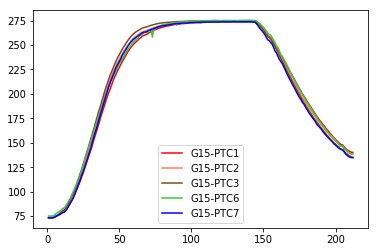

In [0]:
from operator import mod

aPTCno = df.columns[2].strip()      
print(aPTCno)
aPTCno = aPTCno[aPTCno.find('PTC')+3 : len(aPTCno)]
print(aPTCno, mod(int(aPTCno),10))

plotRecipeGroupFileCurve(df)